In [2]:

#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import math
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import os
import random
import re

[(0.73936227, 0.90443867, 0.85757238), (0.73936227, 0.90443867, 0.85757238), (0.73936227, 0.90443867, 0.85757238), (0.73936227, 0.90443867, 0.85757238), (0.72888063, 0.89639109, 0.85488394), (0.72888063, 0.89639109, 0.85488394), (0.72888063, 0.89639109, 0.85488394), (0.72888063, 0.89639109, 0.85488394), (0.72888063, 0.89639109, 0.85488394), (0.71834255, 0.88842162, 0.8521605), (0.71834255, 0.88842162, 0.8521605), (0.71834255, 0.88842162, 0.8521605), (0.71834255, 0.88842162, 0.8521605), (0.71834255, 0.88842162, 0.8521605), (0.70773866, 0.88052939, 0.849422), (0.70773866, 0.88052939, 0.849422), (0.70773866, 0.88052939, 0.849422), (0.70773866, 0.88052939, 0.849422), (0.69706215, 0.87271313, 0.84668315), (0.69706215, 0.87271313, 0.84668315), (0.69706215, 0.87271313, 0.84668315), (0.69706215, 0.87271313, 0.84668315), (0.69706215, 0.87271313, 0.84668315), (0.68629021, 0.86497329, 0.84398721), (0.68629021, 0.86497329, 0.84398721), (0.68629021, 0.86497329, 0.84398721), (0.68629021, 0.86497329,

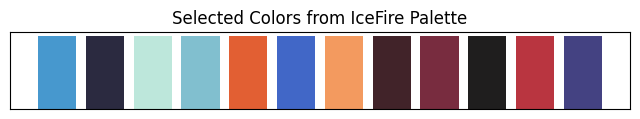

In [54]:
# Define the IceFire palette
icefire_36 = sns.color_palette("icefire", n_colors=1200)
print(icefire_36)

# Extract colors at the specified indices
my_col_indices = np.arange(0, 1200, 100) 
my_icefire = [icefire_36[i] for i in my_col_indices]
# Shuffle the selected colors to make then not gradual
np.random.shuffle(my_icefire)

# Print the selected colors
print(my_icefire)
print(len(my_icefire))

# Create a bar plot to visualize the selected colors
plt.figure(figsize=(8, 1))
for i, color in enumerate(my_icefire):
    plt.bar(i, 1, color=color)

plt.title('Selected Colors from IceFire Palette')
plt.xticks([])
plt.yticks([])
plt.show()

## Figure 1

In [36]:

# Creating 1D sine wave

x = np.arange(0, 100, 1)
landscape = np.sin(2 * np.pi * x / 60)

# Adding random noise
noise = np.random.normal(0, 0.035, len(x))  # Mean of 0, standard deviation of 0.1
y_noisy = landscape #+ noise

# adding Species richness
speciesrich =  (0.5  * np.sin(2 * np.pi * (x + (random.randint(0,20)/10)) / 60)) + 2 #+ np.random.normal(0, 0.035, len(x))) 

# adding derivative of envrionmental variable
derivative = (np.pi / 30) * abs(np.cos(2 * np.pi * x / 60)) #+ np.random.normal(0, 0.0035, len(x))
speciesrich2 =  (0.5  * abs(np.cos(2 * np.pi * (x + (random.randint(0,20)/10)) / 60))) + 2 #+ np.random.normal(0, 0.035, len(x)))
speciesrich2 =  np.sin(2 * np.pi * x / 30 +1.5) + 2


speciesrich_noise =  (0.5  * abs(np.cos(2 * np.pi * (x + (random.randint(0,20)/10)) / 60))) + 2 + np.random.normal(0, 0.035, len(x))


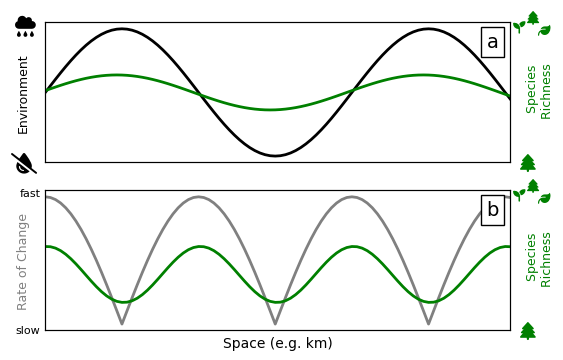

In [37]:
from matplotlib.font_manager import FontProperties

fp1 = FontProperties(fname=r"/Users/gb4818/Library/Fonts/Font Awesome 6 Free-Solid-900.otf")
symbols = dict(freeze = "\u2744", tree = "\uf1bb", sun = "\u2600", high = "\uf2c7", low = "\uf2cb", bird = "\uf520", frog = "\uf52e", nowater = "\uf5c7", rain = "\u26c6", leaf ='\uf06c', leaf2 ='\uf4d8', montagna = '\uf6fc', sealevel = '\uf773' )

# Create a single figure and subplots
fig, ( ax3, ax2) = plt.subplots(2, 1, figsize=(6,4), sharex=True)

# first subplot
line5, = ax3.plot(x, y_noisy, linewidth=2, color='black', label='Temperature')
ax3_twin = ax3.twinx()
line6, = ax3_twin.plot(x, speciesrich, linewidth=2, color='green', label='Species Richness')

ax3_twin.set_ylim(0, 4)
ax3.set_xlim(0, 91)
ax3.set_yticklabels([])
ax3_twin.set_yticklabels([]) 
ax3.text(0.975, 0.93, 'a', transform=ax3.transAxes, fontsize=14, va='top', ha='right', bbox=dict(facecolor='white', alpha=1,))
ax3.set_ylabel('Environment', fontsize=9)


# second subplot
line3, = ax2.plot(x, derivative, linewidth=2, color='gray', label='Temperature Derivative')
ax2.set_xlabel('Space (e.g. km)')
ax2_twin = ax2.twinx()
line4, = ax2_twin.plot(x, speciesrich2, linewidth=2, color='green', label='Species Richness')
ax2_twin.set_ylim(0, 5)
ax2.set_yticklabels([])  
ax2_twin.set_yticklabels([]) 
ax2.text(0.975, 0.93, 'b', transform=ax2.transAxes, fontsize=14, va='top', ha='right', bbox=dict(facecolor='white', alpha=1))
ax2.set_ylabel('Rate of Change', color='gray', fontsize=9)


# Icons:  Add 'H' and 'L' text to the y-axis of ax3_twin
for ax in [ax3_twin, ax2_twin]:
    
    ax.text(1.005, 0.97, symbols['leaf2'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')
    ax.text(1.035, 1.045, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=10, va='center', ha='left', color='green')
    ax.text(1.06, 0.96, symbols['leaf'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')
    ax.text(1.02, 0.0, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=13, va='center', ha='left', color='green')
    ax.set_ylabel('   Species \n Richness', color='green', fontsize=9)
    ax.set_yticklabels([])


for ax in [ax3]:
    
    ax.text(-0.02, 0.98, symbols['rain'], fontproperties=fp1, transform=ax.transAxes, fontsize=15, va='center', ha='right')
    ax.text(-0.02, 0, symbols['nowater'], fontproperties=fp1, transform=ax.transAxes, fontsize=15, va='center', ha='right')
    
for ax in [ax2, ax3, ax3_twin, ax2_twin]:
    ax.tick_params(axis='y', which='both', left=False, right=False)
    ax.set_xticks([])

ax2.text(-0.01, 0.98, 'fast' , transform=ax2.transAxes, fontsize=8, va='center', ha='right')
ax2.text(-0.01, 0, 'slow',  transform=ax2.transAxes, fontsize=8, va='center', ha='right')


# plt.tight_layout()  

plt.show()
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-1_high_res.png', dpi=300, bbox_inches='tight')

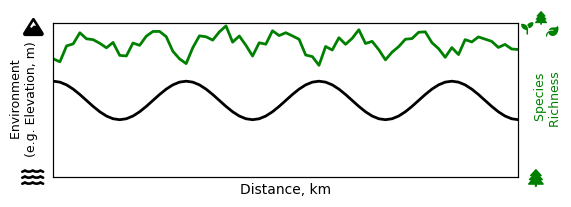

In [65]:
# Create a single figure and subplots
fig, ax = plt.subplots(figsize=(6, 2))

x = np.arange(0, 200, 1)
y_noisy = np.sin(2 * np.pi * x / 20)
speciesrich_noise =  (np.pi / 5) * abs(np.cos(np.pi * x / 10)) + 2 + np.random.normal(0, 0.15, len(x))


line5, = ax.plot(x, y_noisy, linewidth=2, color='black', label='Temperature')
ax_twin = ax.twinx()
# making Species Richness a bit more noisy so that it looks realistic
line6, = ax_twin.plot(x, speciesrich_noise, linewidth=2, color='green', label='Species Richness')

#lims
ax_twin.set_ylim(-1.5, 3)
ax.set_xlim(5, 75)
ax.set_ylim(-4, 4)
#labels
ax.set_ylabel('  Environment \n (e.g. Elevation, m)', fontsize=9)
ax.set_xlabel('Distance, km')

#ticks
ax.set_yticklabels([])
ax_twin.set_yticklabels([]) 
ax.set_xticklabels([])
ax.tick_params(axis='y', left=False, right=False)
ax_twin.tick_params(axis='y', left=False, right=False)
ax.set_xticks([])

# add icons
ax.text(-0.02, 0.98, symbols['montagna'], fontproperties=fp1, transform=ax.transAxes, fontsize=15, va='center', ha='right')
ax.text(-0.02, 0, symbols['sealevel'], fontproperties=fp1, transform=ax.transAxes, fontsize=15, va='center', ha='right')

ax_twin.text(1.005, 0.97, symbols['leaf2'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')
ax_twin.text(1.035, 1.045, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=10, va='center', ha='left', color='green')
ax_twin.text(1.06, 0.96, symbols['leaf'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')

ax_twin.text(1.02, 0.0, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=13, va='center', ha='left', color='green')
ax_twin.set_ylabel('   Species \n Richness', color='green', fontsize=9)
ax_twin.set_yticklabels([])





fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-1a_high_res.png', dpi=300, bbox_inches='tight', transparent=True)

## Figure 2 

In [55]:
d = [3, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 50]
# d = list(range(1, 15))
b = list(range(0, 256))  # All integers from 0 to 255
a = list(range(361))  # All integers from 0 to 360 
# empty list to store result of x
results = []

# loop over each combination of d, b, and a
for di in d:
    for bi in b:
        # find the value of x
        x = (math.sqrt((65536) / (bi + 1)) - 16) * (1/ di) 
        
        # Append the result to the list
        results.append([di, bi, x])

# Create a DataFrame to store the results
df = pd.DataFrame(results, columns=['d', 'b', 'x'])

# Convert 'd' column to categorical data type
df['d'] = df['d'].astype('str')


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1562873068.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1562873068.py:53: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)


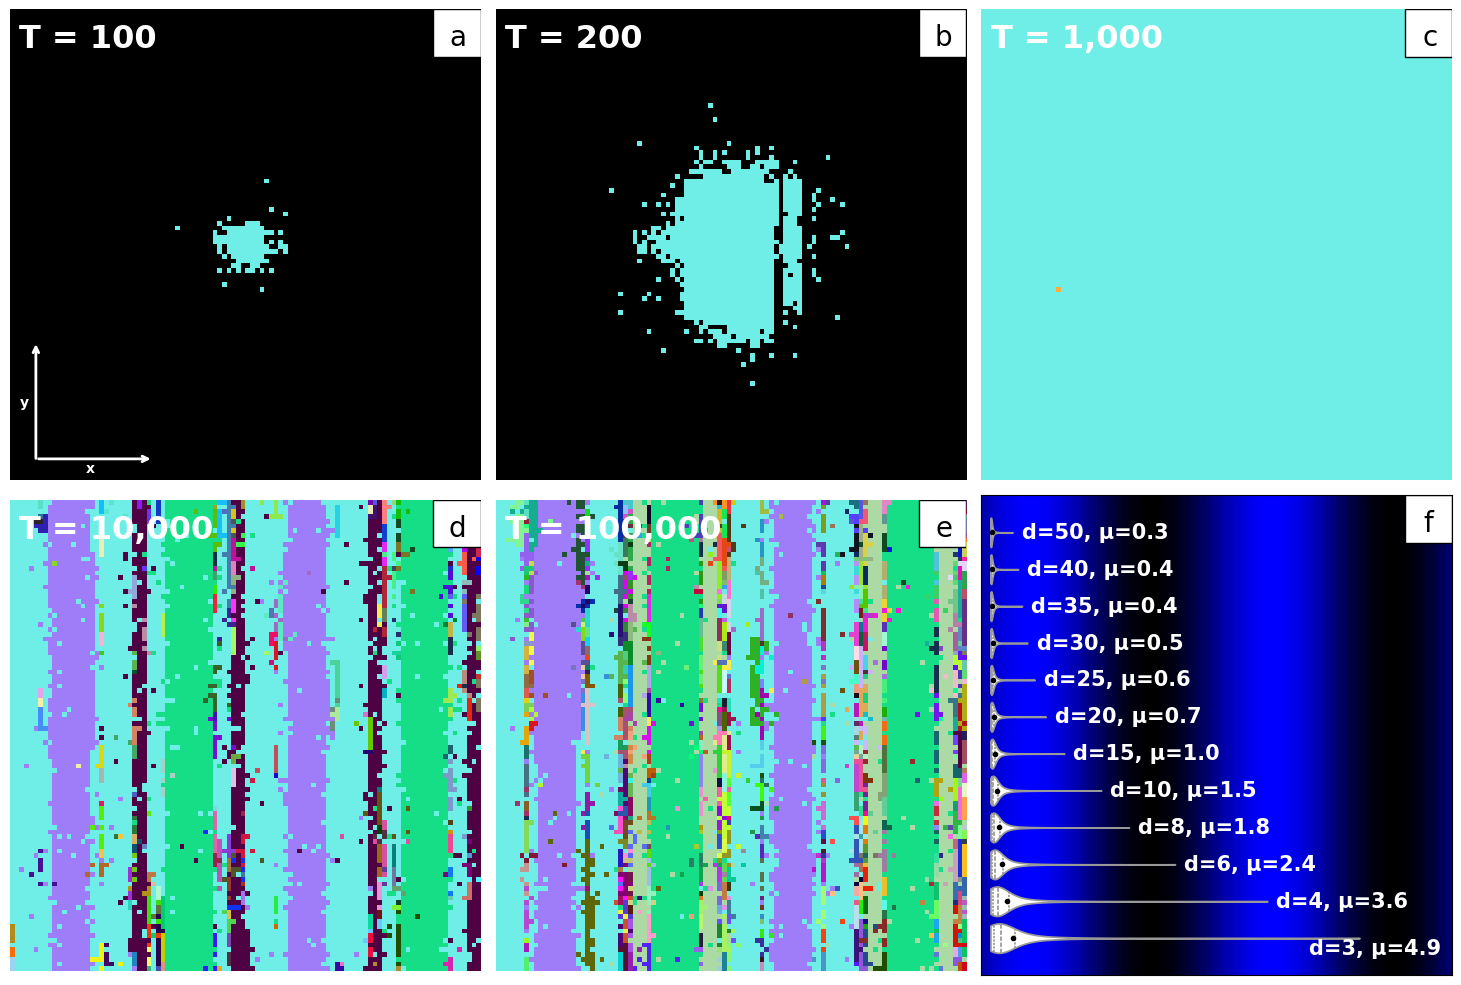

<Figure size 640x480 with 0 Axes>

In [145]:
palette = ['white']

disps = df['d'].unique()  # Get unique categories in sorted order
timestep = ['100', '200', '1,000', '10,000', '100,000' ]

# Paths to the first 5 images
image_paths = [
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000099.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000199.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0009999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0099999.png'
]
# Path to the environment image
last_image_path = mpimg.imread('/Users/gb4818/Desktop/REvoSim_output/w50_0RG/w50_0RG.png')

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the images in the first five plots
for i in range(5):
    img = mpimg.imread(image_paths[i])
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')
    # Add letter and box around it
    ax.text(0.97, 0.97, chr(97 + i), transform=ax.transAxes, fontsize=20,  va='top', ha='right')
    ax.text(0.02, 0.97, f'T = {timestep[i]}', transform=ax.transAxes, fontsize=23,  va='top', ha='left', color='white', weight='bold')
    rect = patches.Rectangle((0.8999, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
    ax.add_patch(rect)
 
# ax = axes[0,2]   
# ax.text(0.05, 0.97, f'Time step = {timestep[2]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')
# ax = axes[1,0]   
# ax.text(0.05, 0.97, f'Time step = {timestep[3]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')
# ax = axes[1,1]   
# ax.text(0.05, 0.97, f'Time step = {timestep[4]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')

# Add arrows to the first plot
ax = axes[0, 0]
ax.annotate('', xy=(5, 70), xytext=(5, 95.5), arrowprops=dict( lw=2, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)
ax.annotate('', xy=(5, 95), xytext=(30, 95), arrowprops=dict(lw =2, facecolor='white', edgecolor='white', arrowstyle='<-'), zorder=3)
ax.text(0.04, 0.18, 'y', transform=ax.transAxes, fontsize=10,  va='top', ha='right', color='white', weight='bold')
ax.text(0.18, 0.04, 'x', transform=ax.transAxes, fontsize=10,  va='top', ha='right', color='white', weight='bold')

# ax.annotate('', xy=(5, 70), xytext=(5, 95),arrowprops=dict(edgecolor='red', arrowstyle='->'),  zorder=3)
# ax.annotate('', xy=(5, 95), xytext=(30, 95),
#                    arrowprops=dict(edgecolor='blue', arrowstyle='<-'),  zorder=3)

# Plot the violin plot in the sixth plot
ax = axes[1, 2]
palette = ['white']
sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_xlim(-2, 100)
ax.imshow(last_image_path, extent=[-5, 100, -1, (len(df['d'].unique()))], aspect='auto')
# Add letter and box around it
ax.text(0.96, 0.97, 'f', transform=ax.transAxes, fontsize=20,  va='top', ha='right')
rect = patches.Rectangle((0.8999, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
ax.add_patch(rect)

for i, disp in enumerate(disps):
    # Calculate median and mean
    median_val = df[df['d'] == disp]['x'].median()
    mean_val = df[df['d'] == disp]['x'].mean()
    max_value = df[df['d'] == disp]['x'].max()
    ax.plot(mean_val, i, 'o', color = "black", markersize=3, zorder=3)  # Plot mean point

    # Annotate the mean value using the μ symbol
    # ax.text(mean_val + (57-mean_val), i, f'd={disp}, μ={mean_val:.1f}', verticalalignment='center', horizontalalignment='left', fontsize=15, color='White',  weight='bold')
    # ax.text(max_value + 2, i, f'd:{disp}, μ={mean_val:.1f}', verticalalignment='center', horizontalalignment='left', fontsize=12, color='White',  weight='bold')
    # Annotate the mean value using the μ symbol
    if disp != '3':
        ax.text(max_value + 2, i, f'd={disp}, μ={mean_val:.1f}', verticalalignment='center', horizontalalignment='left', fontsize=15, color='White', weight='bold')
    else:
        ax.text(max_value - 11, i, f'd={disp}, μ={mean_val:.1f}', verticalalignment='top', horizontalalignment='left', fontsize=15, color='White', weight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-2_high_res.png', dpi=300, bbox_inches='tight')

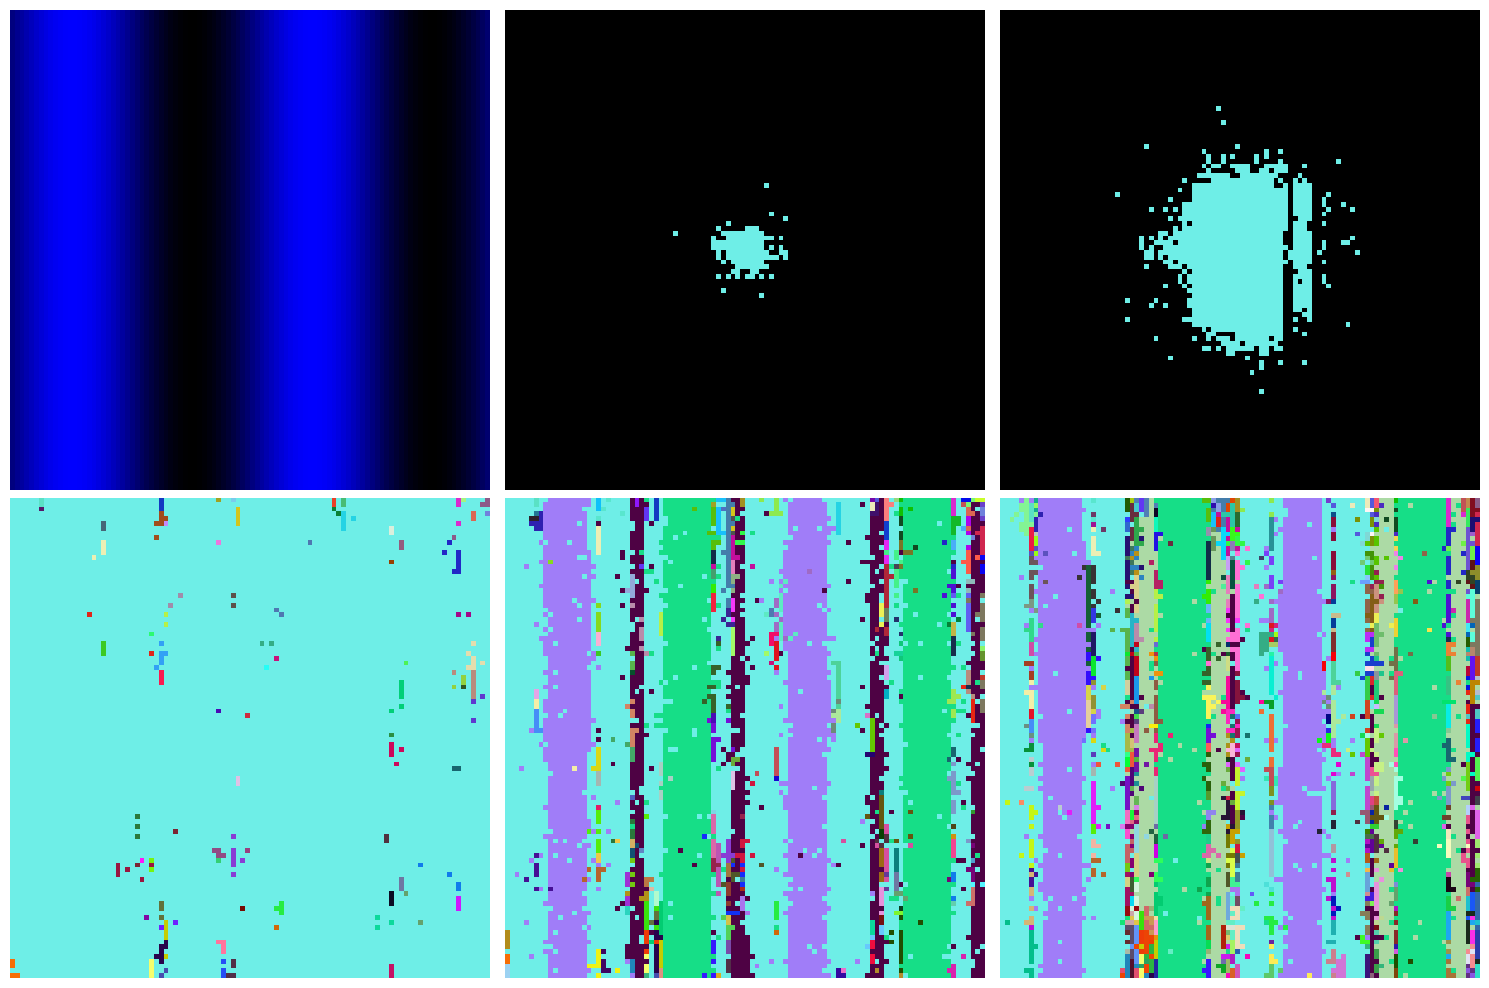

In [162]:

palette = ['white']

# Paths to the pns
image_paths = [
    '/Users/gb4818/Desktop/REvoSim_output/w50_0RG/w50_0RG.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000099.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000199.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0004999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0009999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0029999.png'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the images in the first five plots
for i in range(6):
    img = mpimg.imread(image_paths[i])
    ax = axes[(i)//3, (i)%3]
    ax.imshow(img)
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-3_high_res.png', dpi=300, bbox_inches='tight')

In [ ]:

palette = ['white']

# Paths to the pns
image_paths = [
    '/Users/gb4818/Desktop/REvoSim_output/w50_0RG/w50_0RG.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000099.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0000199.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0004999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0009999.png',
    '/Users/gb4818/Desktop/REvoSim_output/15dp/poster/REvoSim_output/species/REvoSim_species_it_0029999.png'
]


for i, path in enumerate(image_paths):
    fig, ax = plt.subplots(figsize=(10, 10)) 
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    fig.savefig(f'/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-grid_high_res{[i]}.png', dpi=300, bbox_inches='tight')

In [170]:
# CALCULATE THE G NUMBER = WAVELEGTH / MAX DISPLACEMENT
# extract the maximum displacement for each d
max_disp = df.groupby('d')['x'].max()
print("The maximum displacement is \n", max_disp)

# Calculate the G number
g_number = 50 / max_disp
print("The G Number is \n", g_number)

The maximum displacement is 
 d
10    24.000000
15    16.000000
20    12.000000
25     9.600000
3     80.000000
30     8.000000
35     6.857143
4     60.000000
40     6.000000
50     4.800000
6     40.000000
8     30.000000
Name: x, dtype: float64
The G Number is 
 d
10     2.083333
15     3.125000
20     4.166667
25     5.208333
3      0.625000
30     6.250000
35     7.291667
4      0.833333
40     8.333333
50    10.416667
6      1.250000
8      1.666667
Name: x, dtype: float64


## Figure 3 

In [171]:
combined_df = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_15dp_iterations_species_richness.csv', index_col=0)      

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/3616384272.py:22: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


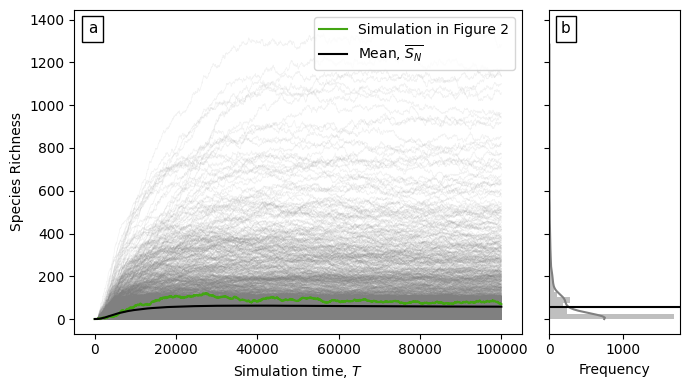

In [172]:
# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('dp')

# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

#filder one dataframe ro get only one simylation and highlight that
one_sim = combined_df[combined_df['Simulation']== 'REvoSim_log_HL.txt']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    fig = plt.figure(figsize=(7, 4))
    #fig.suptitle(f"d = {environment}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3], sharey=ax_main)  
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()

    # Add an individual simulation highlighted
    sns.lineplot(data=one_sim, x='Iteration_Number', y='Species_Count', ax = ax_main,  legend=False, linewidth = 1.5, label= 'Simulation in Figure 2', color='#43A513')
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1.5 , label='Mean, ${\\overline{S_N}}$')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')


    # Plot distribution at equilibrium
    data_hist = data[data['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.03, 0.965), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top', bbox=dict(edgecolor='black', facecolor='white') )
    ax_yDist.annotate('b', xy=(0.09, 0.965), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top', bbox=dict(edgecolor='black', facecolor='white') )
    # Set title and axis
    # ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Simulation time, $T$")
    ax_main.set_ylabel("Species Richness")
    

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.tick_params(labelleft=False)
    ax_yDist.set_xlabel("Frequency")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    fig.savefig(f'/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-3_high_res.png', dpi=300, bbox_inches='tight')

## Figure 4

In [3]:
# Combined transect file, contais all x and y position and their number of species
combined_transects = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_15dp_grids_species_richness.csv', sep=',', index_col=0)
print(combined_transects.head())

# Get Blue values as read by Rivosim
colsin = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50_megabatch/combined_colsin_w50_15dp.csv', sep=',')
colsin = colsin.drop_duplicates(subset=['X coord', 'environment B value'])


   X coord  Y coord  Species Richness  \
0        0        0                 1   
1        1        0                 1   
2        2        0                 1   
3        3        0                 1   
4        4        0                 1   

                                        Simulation  dp  
0  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
1  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
2  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
3  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
4  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  


In [18]:


print("The number of rows in colsin is:", colsin.shape[0])

The number of rows in colsin is: 100


In [4]:
# filter to remove the simulations thta have not reached the end
cells = combined_transects.groupby('Simulation').apply(lambda group: group[['X coord', 'Y coord']].drop_duplicates().shape[0])
print(f'There are {cells[cells <= 1].shape[0]} simulations with less than the full grid cell')

There are 129 simulations with less than the full grid cell


In [5]:
# creating a separate index with all of the simulations that didn't run until the end, so that I can effectively remove them from the combined_transects dataframe  
not_end = cells[cells <= 1].index

# Removing them from the combined_transects dataframe
combined_transects = combined_transects[~combined_transects['Simulation'].isin(not_end)]
print('Number of simulations that reached the end',len(combined_transects['Simulation'].unique()))

Number of simulations that reached the end 2871


In [5]:
sims_means = combined_transects.groupby(['Simulation', 'X coord'])['Species Richness'].mean().reset_index()
print(sims_means.head())

# Get unique simulations and select 50 random simulations
unique_simulations = sims_means['Simulation'].unique()
random_simulations = pd.Series(unique_simulations).sample(n=200, replace=False)

# Filter sims_means based on random_simulations to extract only 50 simulations
sims_means_50 = sims_means[sims_means['Simulation'].isin(random_simulations)]
print(sims_means_50.head())

                        Simulation  X coord  Species Richness
0  REvoSim_individuals_data_HL.txt        0              1.36
1  REvoSim_individuals_data_HL.txt        1              1.27
2  REvoSim_individuals_data_HL.txt        2              1.28
3  REvoSim_individuals_data_HL.txt        3              1.32
4  REvoSim_individuals_data_HL.txt        4              1.31
                                           Simulation  X coord  \
1000  REvoSim_individuals_data_envw50_15dp_aj1006.txt        0   
1001  REvoSim_individuals_data_envw50_15dp_aj1006.txt        1   
1002  REvoSim_individuals_data_envw50_15dp_aj1006.txt        2   
1003  REvoSim_individuals_data_envw50_15dp_aj1006.txt        3   
1004  REvoSim_individuals_data_envw50_15dp_aj1006.txt        4   

      Species Richness  
1000               1.0  
1001               1.0  
1002               1.0  
1003               1.0  
1004               1.0  


   Y coord  X coord  Species Richness
0        0        0          1.204458
1        0        1          1.202717
2        0        2          1.218042
3        0        3          1.211425
4        0        4          1.198885


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6513/3788075684.py:6: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=transects_100, x='X coord', y='Species Richness', hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5,)


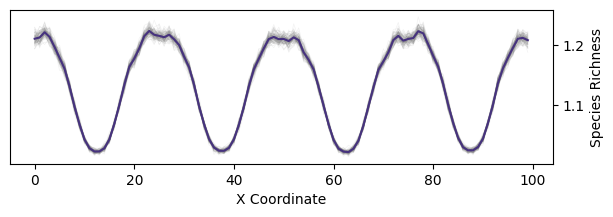

In [34]:
palette = ['gray']
transects_100 = combined_transects.groupby(["Y coord", 'X coord'])['Species Richness'].mean().reset_index()
print(transects_100.head())

fig = plt.subplots(figsize = (7, 2))
sns.lineplot(data=transects_100, x='X coord', y='Species Richness', hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5,)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

In [7]:
# Pivot the data to create an heatmap
pivot_mean = combined_transects.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
# Replace NaN values with 0
pivot_mean = pivot_mean.fillna(0)


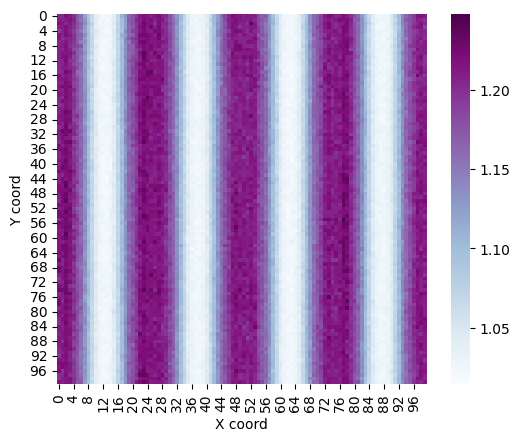

In [8]:
# extract legend from average diversity heatmap
to_get_from = sns.heatmap(pivot_mean, cmap='BuPu', square=True)
# Extract color bar
# Get the colorbar from the heatmap
colorbar = to_get_from.collections[0].colorbar

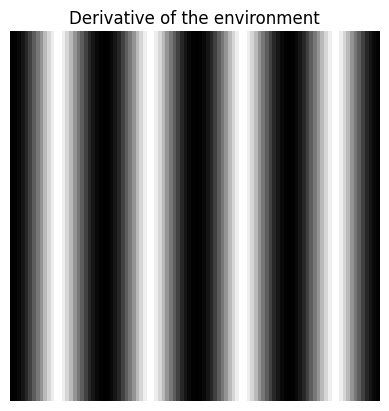

In [9]:

# Derivative of Environment
##### HEATMAP OF THE DERIVATIVE OF THE ENVIRONMENT FUNCTION
wavelength = 50  # define the variable that contains the wavelength
devsin = (255 * np.pi * abs(np.cos(2 * np.pi * (np.arange(0, 100, 1) / wavelength)))) / wavelength  # derivative of the environment function
# devsin = abs((255 * np.pi * np.cos(2 * np.pi * (np.arange(0, 99, 1) / wavelength))) / wavelength)  # derivative of the environment function
# Create a DataFrame with 100 rows and 100 columns
pivot_dev = pd.DataFrame([devsin] * 100)

# heatmap
# Plot the additional heatmap in the third subplot (right side)
sns.heatmap(pivot_dev, cmap='Greys', cbar=False, square=True) 
plt.axis('off')
plt.title(f'Derivative of the environment') 
plt.show()

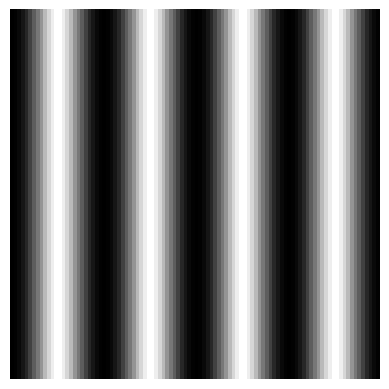

In [229]:
# Derivative of Environment
# Plot the additional heatmap in the third subplot (right side)
sns.heatmap(pivot_dev, cmap='Greys', cbar=False, square=True) 
plt.axis('off')
plt.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/heatmap_panel_4.png', dpi=300, bbox_inches='tight')

NameError: name 'pivot_dev' is not defined

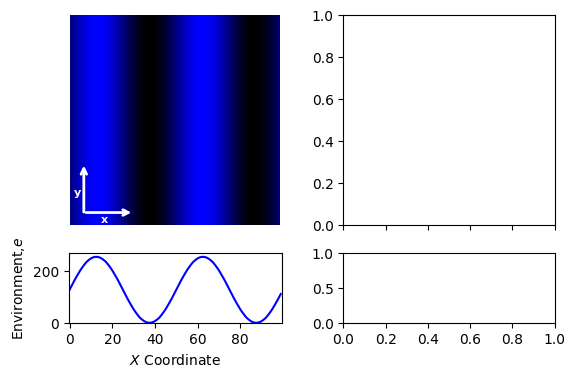

In [6]:
######################
### PANEL CREATION ###
######################
# Load the image to get its dimensions
img = mpimg.imread('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/environments/w50/w50_0RG.png')


# Create a figure
fig = plt.figure(figsize=(9, 4))
# Create a grid layout
GridSpec = gridspec.GridSpec(ncols=4, nrows=1, figure= fig, width_ratios=[1, 0.99, 1, 0.28], wspace=0.00, hspace=0.0, top=0.0, bottom=0.0, left=0.0, right=0.0)

# Set the x-axis tick positions and labels
x_ticks = [0, 20, 40, 60, 80]  # Define the positions of the ticks
x_tick_labels = ['0', '20', '40', '60', '80']  # Define the labels for the ticks

####### SUBFIGURE ONE, TAKING THE FIRST COLOUMN
subfig1 = fig.add_subfigure(GridSpec[:, 0] )
# adding 2 plots for the suplots
subplots1 = subfig1.subplots(nrows=2, ncols=1, height_ratios=[3, 1], sharex=True)
subfig1.subplots_adjust(wspace=0, hspace=0.2)
# plot 1 -upper
subplots1[0].imshow(img)
subplots1[0].axis('off')
#subplots1[0].text(0.5, 1.03, 'Environment (w=50)', horizontalalignment='center', verticalalignment='bottom', transform=subplots1[0].transAxes, fontsize=14)
# annotate two axes
subplots1[0].annotate('', xy=(6, 70), xytext=(6, 94.8), arrowprops=dict( lw=2, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)
subplots1[0].annotate('', xy=(5.8, 93.7), xytext=(30, 93.7), arrowprops=dict(lw =2, facecolor='white', edgecolor='white', arrowstyle='<-'), zorder=3)
subplots1[0].text(0.05, 0.18, 'y', transform=subplots1[0].transAxes, fontsize=8,  va='top', ha='right', color='white', weight='bold')
subplots1[0].text(0.18, 0.052, 'x', transform=subplots1[0].transAxes, fontsize=8,  va='top', ha='right', color='white', weight='bold')
# plot 1 -lower
sns.lineplot(data=colsin, x='X coord', y='environment B value', color="blue", ax=subplots1[1])
subplots1[1].set_ylim(0, 270)
subplots1[1].set_xlabel('$X$ Coordinate')
subplots1[1].set_ylabel('Environment,$e$')


####### SUBFIGURE TWO, TAKING THE CENTRAL COLOUMN
subfig2 = fig.add_subfigure(GridSpec[:, 1])
# adding 2 plots for the suplots
subplots2 = subfig2.subplots(nrows=2, ncols=1, height_ratios=[3, 1], sharex=True)
# plot 2 -Upper
sns.heatmap(pivot_dev, cmap='Greys', ax=subplots2[0], cbar=False, square=True)
subplots2[0].axis('off')
#subplots2[0].text(0.5, 1.03, 'Derivative (abs)', horizontalalignment='center', verticalalignment='bottom', transform=subplots2[0].transAxes, fontsize=14)
# plot 2 - Lower
subplots2[1].plot(list(range(0, 100)), devsin, color="black")
# subplots2[1].set_ylim(0, 270)
# subplots2[1].set_yticks([])
subplots2[1].set_xlabel('$X$ Coordinate')
subplots2[1].set_ylabel('${|\\dot{e}|}$') #labelpad=-1
subplots2[1].set_xticks(x_ticks)
subplots2[1].set_xticklabels(x_tick_labels)



####### SUBFIGURE THREE, TAKING THE RIGHT COLOUMN
subfig3 = fig.add_subfigure(GridSpec[:, 2])
# adding 2 plots for the suplots

subplots3 = subfig3.subplots(nrows=2, ncols=1, height_ratios=[3, 1], sharex=True)
# plot 3 - Upper
sns.heatmap(pivot_mean, cmap='BuPu', ax=subplots3[0], square=True, cbar=False)
subplots3[0].axis('off')
#subplots3[0].text(0.5, 1.03, 'Average Species Richness', horizontalalignment='center', verticalalignment='bottom', transform=subplots3[0].transAxes, fontsize=14)
# plot 3 - Lower
sns.lineplot(data=transects_100, x='X coord', y='Species Richness', hue='Y coord', palette = 'Greys', errorbar=None, legend=False, alpha=0.1, linewidth = 0.5)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], ax=subplots3[1], errorbar=None)
subplots3[1].set_xlabel('$X$ Coordinate')
subplots3[1].yaxis.tick_right()
subplots3[1].yaxis.set_label_position("right")
subplots3[1].set_ylabel('  Species \n Richness')
subplots3[1].set_xticks(x_ticks)
subplots3[1].set_xticklabels(x_tick_labels)
####### SUBFIGURE FOUR, LEGEND COLOUMN
subfig4 = fig.add_subfigure(GridSpec[:, 3])
subplots4 = subfig4.subplots(nrows=2, ncols=1, height_ratios=[3, 1])
subplots4[0].axis('off')
cb = plt.colorbar(to_get_from.get_children()[0], ax=subplots4[0], label=colorbar.ax.yaxis.label.get_text(), pad=0.5, location='left')
# Set the ticks on the right side
cb.ax.yaxis.set_ticks_position('right')
subplots4[1].axis('off')

letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate([subplots1[0], subplots2[0], subplots3[0]]):
    ax.annotate(letters[i], xy=(0.96, 0.96), xycoords='axes fraction', fontsize=11,
                horizontalalignment='right', verticalalignment='top',
                bbox=dict(boxstyle='square', facecolor='white', edgecolor='black'))

letters = [ 'd', 'e', 'f']
for i, ax in enumerate( [subplots1[1], subplots2[1], subplots3[1]]):
    ax.annotate(letters[i], xy=(0.95, 0.9), xycoords='axes fraction', fontsize=11,
                horizontalalignment='right', verticalalignment='top',
                bbox=dict(boxstyle='square', facecolor='white', edgecolor='black'))


fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-4_high_res.png', dpi=300, bbox_inches='tight')

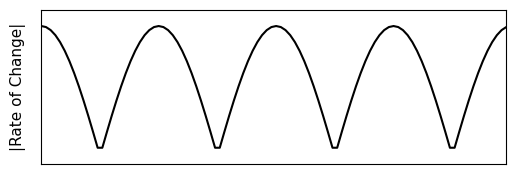

In [32]:
# Same graph as the one in intro but with real data
# Create a single figure and subplots
fig, ax = plt.subplots(figsize=(6, 2))

# Derivative environment
wavelength = 50
devsin = (255 * np.pi * abs(np.cos(2 * np.pi * (np.arange(0, 100 , 1) / wavelength)))) / wavelength  # derivative of the environment function
ax.plot(devsin, color="black")

#lims
ax.set_xlim(0, 99)
ax.set_ylim(-1, 18)

# labels
ax.set_ylabel('|Rate of Change|', fontsize=11)


# ticks
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y', left=False, right=False)
ax.set_xticks([])

# Saving the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-results_der_high_res.png', dpi=300, bbox_inches='tight', transparent=True)


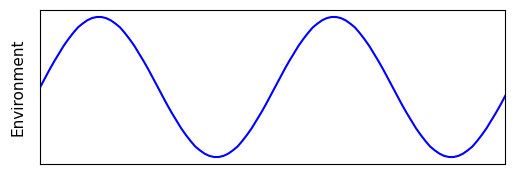

In [31]:
# Same graph as the one in intro but with real data
# Create a single figure and subplots
fig, ax = plt.subplots(figsize=(6, 2))

# Derivative environment
sns.lineplot(data=colsin, x='X coord', y='environment B value', color="blue", ax=ax)

ax.set_xlim(0, 99)
# labels
ax.set_ylabel('Environment', fontsize=11)
ax.set_xlabel('')

# ticks
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y', left=False, right=False)
ax.set_xticks([])

# Saving the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-results_env_high_res.png', dpi=300, bbox_inches='tight', transparent=True)


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6513/3183327587.py:7: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=transects_100, x='X coord', y='Species Richness', ax=ax, hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5)


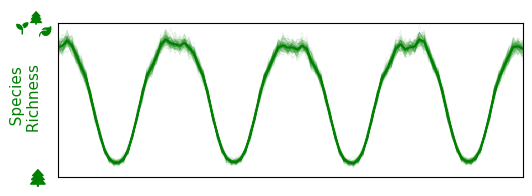

In [39]:
# Same graph as the one in intro but with real data
# Create a single figure and subplots
fig, ax = plt.subplots(figsize=(6, 2))

# Species Richness
palette = ['green']
sns.lineplot(data=transects_100, x='X coord', y='Species Richness', ax=ax, hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', ax=ax, color='green', errorbar=None)

ax.set_xlim(0, 99)
ax.set_ylim(1, 1.25)
ax.set_xlabel('')

# ticks
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y', left=False, right=False)
ax.set_xticks([])

# add icons
ax.text(-0.09, 0.97, symbols['leaf2'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')
ax.text(-0.06, 1.045, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=10, va='center', ha='left', color='green')
ax.text(-0.04, 0.96, symbols['leaf'], fontproperties=fp1, transform=ax.transAxes, fontsize=9, va='center', ha='left', color='green')
ax.text(-0.06, 0.0, symbols['tree'], fontproperties=fp1, transform=ax.transAxes, fontsize=13, va='center', ha='left', color='green')
ax.set_ylabel('   Species \n Richness', color='green', fontsize=11)
ax.set_yticklabels([])

# Saving the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Poster/Poster-results_sr_high_res.png', dpi=300, bbox_inches='tight', transparent=True)


## Figure 5 

In [56]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_grids_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversit

In [200]:
# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as '{dp}'")


20dp
File 'w50_20dp_grids_species_richness.csv' imported as 'grid_20dp'
35dp
File 'w50_35dp_grids_species_richness.csv' imported as 'grid_35dp'
3dp
File 'w50_3dp_grids_species_richness.csv' imported as 'grid_3dp'
50dp
File 'w50_50dp_grids_species_richness.csv' imported as 'grid_50dp'
25dp
File 'w50_25dp_grids_species_richness.csv' imported as 'grid_25dp'
30dp
File 'w50_30dp_grids_species_richness.csv' imported as 'grid_30dp'
40dp
File 'w50_40dp_grids_species_richness.csv' imported as 'grid_40dp'
8dp
File 'w50_8dp_grids_species_richness.csv' imported as 'grid_8dp'
6dp
File 'w50_6dp_grids_species_richness.csv' imported as 'grid_6dp'
4dp
File 'w50_4dp_grids_species_richness.csv' imported as 'grid_4dp'
15dp
File 'w50_15dp_grids_species_richness.csv' imported as 'grid_15dp'
10dp
File 'w50_10dp_grids_species_richness.csv' imported as 'grid_10dp'


In [201]:
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

['20dp', '35dp', '3dp', '50dp', '25dp', '30dp', '40dp', '8dp', '6dp', '4dp', '15dp', '10dp']
[20, 35, 3, 50, 25, 30, 40, 8, 6, 4, 15, 10]


In [202]:
# Make sure we remove the transects that did not run until the end
for dp, df in dfs_int_keys.items():
    # Group the DataFrame by 'Simulation' and count the number of unique 'X coord' values
    cells = df.groupby('Simulation').apply(lambda group: group['X coord'].nunique())
    # Get the simulations that did not run until the end
    not_end = cells[cells <= 1].index
    # Remove the simulations that did not run until the end
    dfs_int_keys[dp] = df[~df['Simulation'].isin(not_end)]

    print(f"Number of complete simulations for d = {dp}: {len(dfs_int_keys[dp]['Simulation'].unique())}")

Number of complete simulations for d = 20: 2896
Number of complete simulations for d = 35: 2879
Number of complete simulations for d = 3: 2769
Number of complete simulations for d = 50: 2892
Number of complete simulations for d = 25: 2855
Number of complete simulations for d = 30: 2897
Number of complete simulations for d = 40: 2886
Number of complete simulations for d = 8: 2891
Number of complete simulations for d = 6: 2878
Number of complete simulations for d = 4: 2846
Number of complete simulations for d = 15: 2871
Number of complete simulations for d = 10: 2900


In [203]:
mean_transects = {} # Dictionary to store mean DataFrames for each dp

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    mean_t = dfs_int_keys[key].groupby('X coord')['Species Richness'].mean().reset_index()
    mean_transects[dp] = mean_t
    
    print(f"Mean calculated for 'd = {dp}'")
    print(mean_transects[key].head())
    
# the folowing will help me plot multiple gray line behind the main line
mean_transects_100 = {} # Dictionary to store mean DataFrames for each dp and each Y direction too

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    mean_t_100 = dfs_int_keys[key].groupby(["Y coord", 'X coord'])['Species Richness'].mean().reset_index()
    mean_transects_100[dp] = mean_t_100
    
    print(mean_transects_100[key].head())



Mean calculated for 'd = 3'
   X coord  Species Richness
0        0          1.112163
1        1          1.110578
2        2          1.109047
3        3          1.107440
4        4          1.104081
Mean calculated for 'd = 4'
   X coord  Species Richness
0        0          1.174729
1        1          1.171142
2        2          1.166725
3        3          1.162305
4        4          1.155281
Mean calculated for 'd = 6'
   X coord  Species Richness
0        0          1.221463
1        1          1.217828
2        2          1.212575
3        3          1.207311
4        4          1.196258
Mean calculated for 'd = 8'
   X coord  Species Richness
0        0          1.199723
1        1          1.197395
2        2          1.193213
3        3          1.186423
4        4          1.178132
Mean calculated for 'd = 10'
   X coord  Species Richness
0        0          1.206693
1        1          1.199231
2        2          1.195193
3        3          1.191734
4        4        

In [286]:
# find the min and max values of the mean transects
min_value_mean_100 = float('inf')
max_value_mean_100 = float('-inf')


for df in mean_transects_100.values():
    min_val_mean_100 = df['Species Richness'].min()
    max_val_mean_100 = df['Species Richness'].max()
    if min_val_mean_100 < min_value_mean_100:
        min_value_mean_100 = min_val_mean_100
    if max_val_mean_100 > max_value_mean_100:
        max_value_mean_100 = max_val_mean_100

# Then, normalize both datasets using the min-max normalization formula
normalized_mean_transects_100 = {}

for key, df in mean_transects_100.items():
    normalized_df_mean_100 = df.copy()
    normalized_df_mean_100['Species Richness'] = (normalized_df_mean_100['Species Richness'] - min_value_mean_100) / (max_value_mean_100 - min_value_mean_100)
    normalized_mean_transects_100[key] = normalized_df_mean_100
    
    print(f"Normalized mean calculated for 'd = {key}'")
    print(normalized_mean_transects_100[key].head())
    
# normalise the derivative
# Normalize devsin
min_value_devsin = np.min(devsin)
max_value_devsin = np.max(devsin)
normalized_devsin = (devsin - min_value_devsin) / (max_value_devsin - min_value_devsin)

# Print the normalized devsin to verify
print(normalized_devsin)

Normalized mean calculated for 'd = 3'
   Y coord  X coord  Species Richness
0        0        0          0.055405
1        0        1          0.051936
2        0        2          0.052752
3        0        3          0.055814
4        0        4          0.049283
Normalized mean calculated for 'd = 4'
   Y coord  X coord  Species Richness
0        0        0          0.092401
1        0        1          0.087239
2        0        2          0.089621
3        0        3          0.084062
4        0        4          0.080885
Normalized mean calculated for 'd = 6'
   Y coord  X coord  Species Richness
0        0        0          0.116807
1        0        1          0.115825
2        0        2          0.106008
3        0        3          0.104241
4        0        4          0.103259
Normalized mean calculated for 'd = 8'
   Y coord  X coord  Species Richness
0        0        0          0.106471
1        0        1          0.103344
2        0        2          0.098848
3       

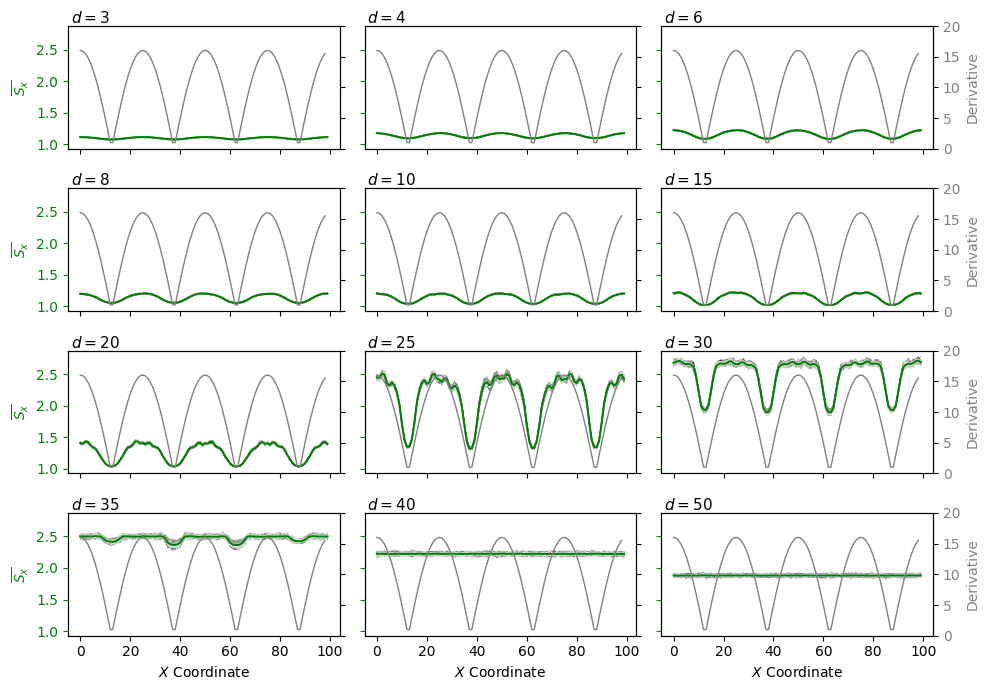

In [212]:
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7), sharex=True, sharey=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(mean_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = mean_transects[key]
    df_100 = mean_transects_100[key]
    sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette='gray', errorbar=None, ax=axs[row, col], legend=False, alpha=0.5, linewidth = 0.5)
    sns.lineplot(data=df, x='X coord', y='Species Richness', color='green', errorbar=None, ax=axs[row, col])
    axs[row, col].text(0.01, 1, f'$d={key}$', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    ax2.plot(list(range(0, 99)), devsin, color="gray", linewidth=1)
    ax2.set_ylabel('devsin', color='gray')  # Labeling the secondary y-axis
    ax2.set_ylim(0, 20)
    # ax2.tick_params(axis='y', labelcolor='black')  # Setting color of tick labels to black
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('Derivative')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}}$', color='green',)
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')


plt.tight_layout()  
plt.show()


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/637689090.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/637689090.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/637689090.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X

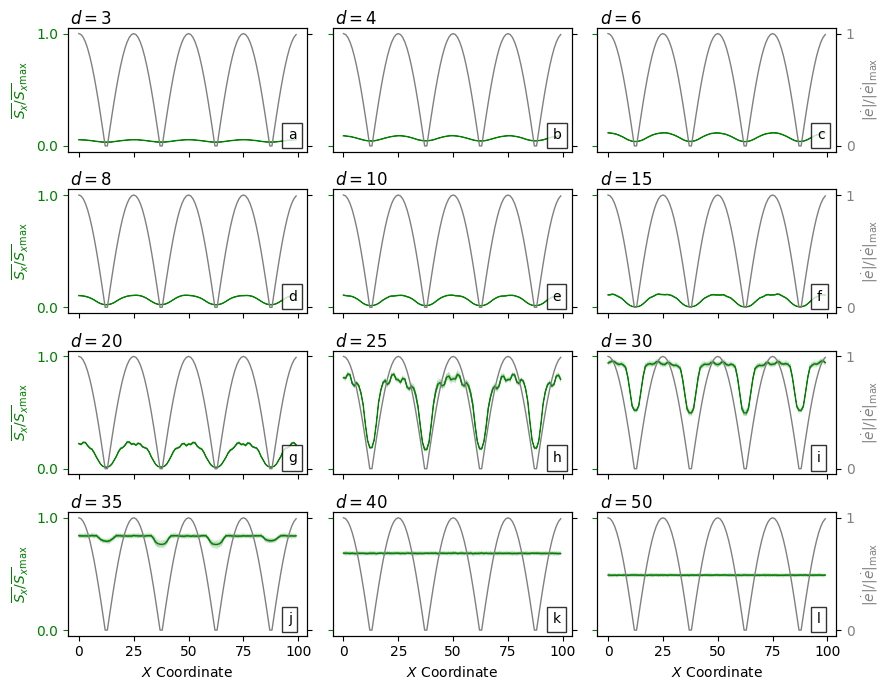

In [287]:
greens = ['green'] #['#213506']
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 7), sharex=True, sharey=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(normalized_mean_transects_100.keys())):
    row = (i) // 3
    col = (i) % 3
    df_100 = normalized_mean_transects_100[key]
    sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df_100, x='X coord', y='Species Richness', errorbar=None, ax=axs[row, col], legend=False, linewidth = 1, color='green')
    
   
    axs[row, col].text(0.01, 1, f'$d={key}$', transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    # axs[row, col].text(0.93, 0.15, letter[i], transform=axs[row, col].transAxes, fontsize=10, verticalalignment='top', color='black' )
    # axs[row, col].add_patch(Rectangle((0.89, 0.008), 0.11, 0.5, linewidth=1, edgecolor='black', facecolor='white', transform=axs[row, col].transAxes, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs[row, col].set_yticks([0, 1])
   
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    ax2.plot(list(range(0, 100)), normalized_devsin, color="gray", linewidth=1)
    ax2.set_ylabel('devsin', color='gray')  # Labeling the secondary y-axis
    ax2.set_yticks([0, 1])
    # ax2.tick_params(axis='y', labelcolor='black')  # Setting color of tick labels to black
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('${|\\dot{e}|/|\\dot{e}|_{\\mathrm{max}}}$')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}/\\overline{S_x}_{\\mathrm{max}}}$', color='green')
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')


plt.tight_layout()  
plt.show()
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-5_high_res.png', dpi=300, bbox_inches='tight')


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/2775958604.py:12: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/2775958604.py:12: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/2775958604.py:12: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x

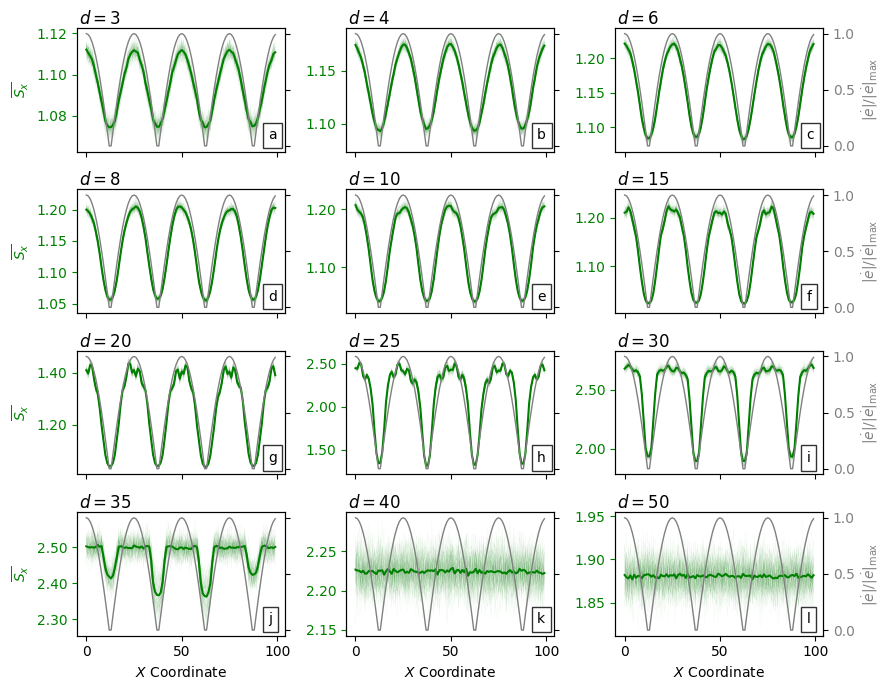

In [289]:
greens = ['green']
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 7), sharex=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(mean_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = mean_transects[key]
    df_100 = mean_transects_100[key]
    sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df, x='X coord', y='Species Richness', color='green', errorbar=None, ax=axs[row, col])
    
   
    axs[row, col].text(0.01, 1, f'$d={key}$', transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    # axs[row, col].text(0.93, 0.15, letter[i], transform=axs[row, col].transAxes, fontsize=10, verticalalignment='top', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # axs[row, col].set_yticks([0, 1])
   
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    ax2.plot(list(range(0, 100)), normalized_devsin, color="gray", linewidth=1)
    ax2.set_ylabel('devsin', color='gray')  # Labeling the secondary y-axis
    # ax2.set_yticks([0, 1])
    # ax2.tick_params(axis='y', labelcolor='black')  # Setting color of tick labels to black
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('${|\\dot{e}|/|\\dot{e}|_{\\mathrm{max}}}$')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}}$', color='green')
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')

axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')
axs[2, 1].set_ylabel('')
axs[3, 1].set_ylabel('')
axs[0, 2].set_ylabel('')
axs[1, 2].set_ylabel('')
axs[2, 2].set_ylabel('')
axs[3, 2].set_ylabel('')


plt.tight_layout()  
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-S3_high_res.png', dpi=300, bbox_inches='tight')

In [390]:
df_100_d30 = mean_transects_100[30]

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1113518312.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1113518312.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1113518312.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x

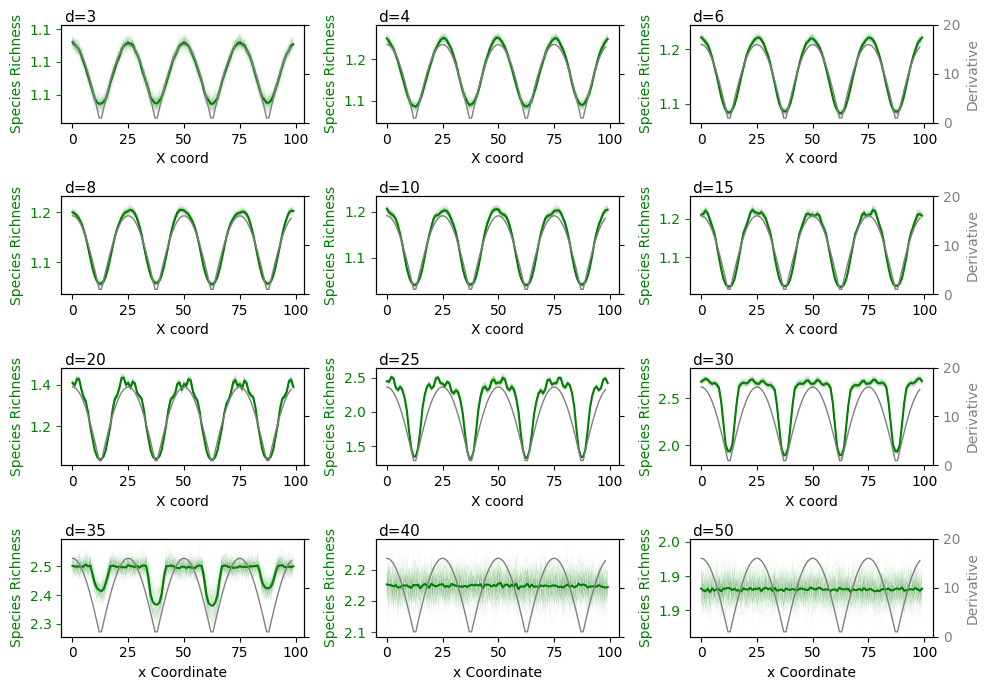

In [215]:
greens = ['green']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7))  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(mean_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = mean_transects[key]
    df_100 = mean_transects_100[key]
    sns.lineplot(data=df_100, x='X coord', y='Species Richness', hue='Y coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df, x='X coord', y='Species Richness', color='green', errorbar=None, ax=axs[row, col])
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    ax2.plot(list(range(0, 99)), devsin, color="gray", linewidth=1)
    ax2.set_ylabel('devsin', color='gray')  # Labeling the secondary y-axis
    ax2.set_ylim(0, 20)
    # ax2.tick_params(axis='y', labelcolor='black')  # Setting color of tick labels to black
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('Derivative')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
        
for ax in axs.flat:
    ax.set_ylabel('Species Richness', color='green')
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('x Coordinate')
axs[3, 1].set_xlabel('x Coordinate')
axs[3, 2].set_xlabel('x Coordinate')


plt.tight_layout()  
plt.show()


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_64335/3176700756.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='Y coord', y='Species Richness', hue='X coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_64335/3176700756.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100, x='Y coord', y='Species Richness', hue='X coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_64335/3176700756.py:11: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_100

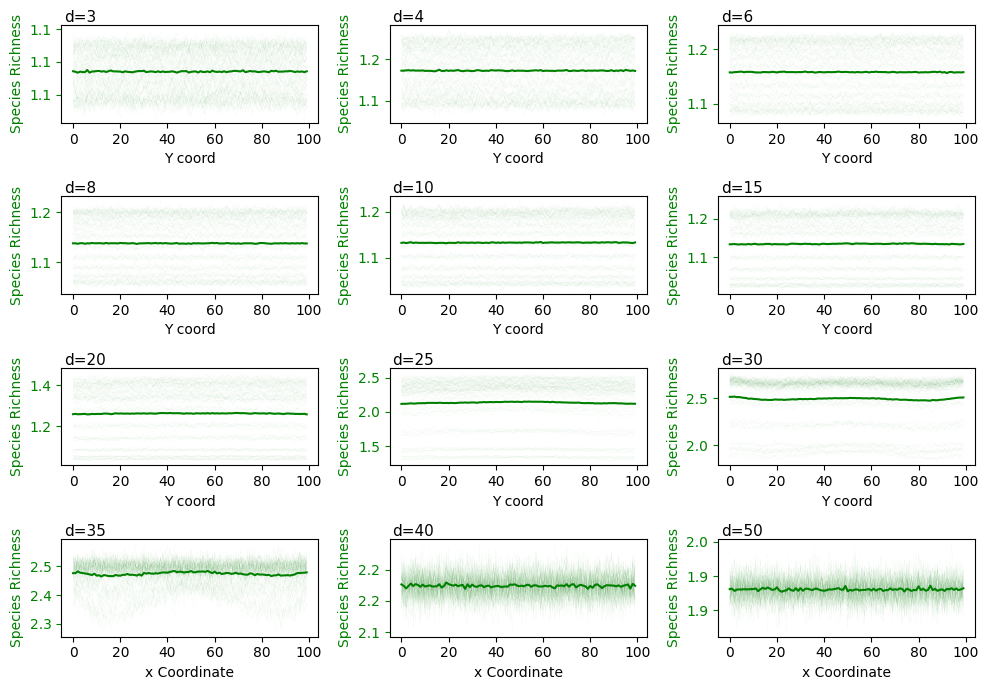

In [32]:
greens = ['green']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7))  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(mean_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = mean_transects[key]
    df_100 = mean_transects_100[key]
    sns.lineplot(data=df_100, x='Y coord', y='Species Richness', hue='X coord', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df_100, x='Y coord', y='Species Richness', color='green', errorbar=None, ax=axs[row, col])
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
    # # Plotting devsin on secondary y-axis
    # ax2 = axs[row, col].twinx()
    # ax2.plot(list(range(0, 99)), devsin, color="gray", linewidth=1)
    # ax2.set_ylabel('devsin', color='gray')  # Labeling the secondary y-axis
    # ax2.set_ylim(0, 20)
    # # ax2.tick_params(axis='y', labelcolor='black')  # Setting color of tick labels to black
    # if key in [6, 15 , 30, 50]:
    #     ax2.set_ylabel('Derivative')
    #     ax2.tick_params(axis='y', labelcolor='gray')
    # else:
    #     ax2.set_ylabel('')
    #     ax2.set_yticklabels([])
        
for ax in axs.flat:
    ax.set_ylabel('Species Richness', color='green')
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('x Coordinate')
axs[3, 1].set_xlabel('x Coordinate')
axs[3, 2].set_xlabel('x Coordinate')


plt.tight_layout()  
plt.show()


## Figure 6

In [216]:
to_correlate = {} # Dictionary to store mean DataFrames for each dp

for i, key in enumerate(sorted(normalized_mean_transects_100.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    mean_T = normalized_mean_transects_100[key].groupby('X coord')['Species Richness'].mean().reset_index()
    to_correlate[dp] = mean_T
    
    print(f"Mean calculated for 'd = {dp}'")
    print(to_correlate[key].head())

Mean calculated for 'd = 3'
   X coord  Species Richness
0        0          0.055116
1        1          0.054220
2        2          0.053354
3        3          0.052446
4        4          0.050548
Mean calculated for 'd = 4'
   X coord  Species Richness
0        0          0.090471
1        1          0.088444
2        2          0.085948
3        3          0.083450
4        4          0.079481
Mean calculated for 'd = 6'
   X coord  Species Richness
0        0          0.116880
1        1          0.114826
2        2          0.111857
3        3          0.108882
4        4          0.102637
Mean calculated for 'd = 8'
   X coord  Species Richness
0        0          0.104595
1        1          0.103279
2        2          0.100916
3        3          0.097079
4        4          0.092394
Mean calculated for 'd = 10'
   X coord  Species Richness
0        0          0.108533
1        1          0.104317
2        2          0.102035
3        3          0.100080
4        4        

In [235]:
# normalise the derivative
wavelength = 50  # define the variable that contains the wavelength
devsin_corr = (255 * np.pi * abs(np.cos(2 * np.pi * (np.arange(0, 100, 1) / wavelength)))) / wavelength  # derivative of the environment function
print(len(devsin_corr))

# Normalize devsin
min_value_devsin_corr = np.min(devsin_corr)
max_value_devsin_corr = np.max(devsin_corr)
normalized_devsin_corr = (devsin_corr - min_value_devsin_corr) / (max_value_devsin_corr - min_value_devsin_corr)

# normalise the environment
envsin = list(colsin['environment B value'])
min_value_envsin_corr = np.min(envsin)
max_value_envsin_corr = np.max(envsin)
normalized_envsin_corr = (envsin - min_value_envsin_corr) / (max_value_envsin_corr - min_value_envsin_corr)

# Print the normalized devsin to verify
print("Derivative Normalised:", normalized_devsin_corr)
print("Environment Normalised:", normalized_envsin_corr)

100
Derivative Normalised: [1.00000000e+00 9.91586407e-01 9.66478317e-01 9.25071699e-01
 8.68019560e-01 7.96221646e-01 7.10810253e-01 6.13132370e-01
 5.04728436e-01 3.87308045e-01 2.62722988e-01 1.32938044e-01
 9.90736826e-16 8.57652775e-16 1.32938044e-01 2.62722988e-01
 3.87308045e-01 5.04728436e-01 6.13132370e-01 7.10810253e-01
 7.96221646e-01 8.68019560e-01 9.25071699e-01 9.66478317e-01
 9.91586407e-01 1.00000000e+00 9.91586407e-01 9.66478317e-01
 9.25071699e-01 8.68019560e-01 7.96221646e-01 7.10810253e-01
 6.13132370e-01 5.04728436e-01 3.87308045e-01 2.62722988e-01
 1.32938044e-01 6.50633140e-16 2.66168103e-16 1.32938044e-01
 2.62722988e-01 3.87308045e-01 5.04728436e-01 6.13132370e-01
 7.10810253e-01 7.96221646e-01 8.68019560e-01 9.25071699e-01
 9.66478317e-01 9.91586407e-01 1.00000000e+00 9.91586407e-01
 9.66478317e-01 9.25071699e-01 8.68019560e-01 7.96221646e-01
 7.10810253e-01 6.13132370e-01 5.04728436e-01 3.87308045e-01
 2.62722988e-01 1.32938044e-01 7.83717191e-16 1.33084051e-

In [241]:
# Dictionary to store correlations for each key
correlations_der = {}

for key, mean_df in to_correlate.items():
    # Access the "Species Richness" column and normalize it
    species_richness_norm = mean_df['Species Richness']
    
    # Calculate correlation
    correlation_der = np.corrcoef(species_richness_norm, normalized_devsin_corr)[0, 1]
    
    # Store correlation coefficient in the dictionary
    correlations_der[key] = correlation_der

# see the values
for key, correlation_der in correlations_der.items():
    print(f"Correlation with derivative for 'd = {key}': {correlation_der:0.2f}")
    
# Dictionary to store correlations for each key
correlations_env = {}

for key, mean_df in to_correlate.items():
    # Access the "Species Richness" column and normalize it
    species_richness_norm = mean_df['Species Richness']
    
    # Calculate correlation
    correlation_env = np.corrcoef(species_richness_norm, normalized_envsin_corr)[0, 1]
    
    # Store correlation coefficient in the dictionary
    correlations_env[key] = correlation_env

# see the values
for key, correlation_env in correlations_env.items():
    print(f"Correlation with environemnt for 'd = {key}': {correlation_env:0.2f}")

Correlation with derivative for 'd = 3': 0.99
Correlation with derivative for 'd = 4': 0.98
Correlation with derivative for 'd = 6': 0.99
Correlation with derivative for 'd = 8': 0.99
Correlation with derivative for 'd = 10': 0.99
Correlation with derivative for 'd = 15': 0.99
Correlation with derivative for 'd = 20': 0.99
Correlation with derivative for 'd = 25': 0.95
Correlation with derivative for 'd = 30': 0.92
Correlation with derivative for 'd = 35': 0.84
Correlation with derivative for 'd = 40': 0.02
Correlation with derivative for 'd = 50': -0.01
Correlation with environemnt for 'd = 3': -0.02
Correlation with environemnt for 'd = 4': -0.05
Correlation with environemnt for 'd = 6': -0.04
Correlation with environemnt for 'd = 8': -0.03
Correlation with environemnt for 'd = 10': -0.02
Correlation with environemnt for 'd = 15': -0.01
Correlation with environemnt for 'd = 20': -0.01
Correlation with environemnt for 'd = 25': -0.01
Correlation with environemnt for 'd = 30': 0.01
Cor

In [242]:
# Dictionary to store correlations for each key and each y position
correlations_long = {}

for key, mean_df in normalized_mean_transects_100.items():
    # Group by Y coordinate
    grouped = mean_df.groupby('Y coord')
    
    # Initialize dictionary to store correlations for each Y coordinate
    y_correlations = {}
    
    for y_coord, group_df in grouped:
        # Access the "Species Richness" column and normalize it
        species_richness_norm = group_df['Species Richness']
        
        # Calculate correlation
        y_correlation = np.corrcoef(species_richness_norm, normalized_devsin_corr)[0, 1]
        
        # Store correlation coefficient for this Y coordinate
        y_correlations[y_coord] = y_correlation
    
    # Store correlations for this key in the main dictionary
    correlations_long[key] = y_correlations

# See the values
for key, y_correlations in correlations_long.items():
    print(f"Correlations for 'd = {key}':")
    for y_coord, y_correlation in y_correlations.items():
        print(f"Y coord: {y_coord}, Correlation with derivative: {y_correlation}")


Correlations for 'd = 3':
Y coord: 0, Correlation with derivative: 0.9658763986747303
Y coord: 1, Correlation with derivative: 0.9666020872770665
Y coord: 2, Correlation with derivative: 0.9619731821952372
Y coord: 3, Correlation with derivative: 0.9663515203943351
Y coord: 4, Correlation with derivative: 0.9664187452418742
Y coord: 5, Correlation with derivative: 0.9563765861486384
Y coord: 6, Correlation with derivative: 0.9681171799532348
Y coord: 7, Correlation with derivative: 0.9626830752557436
Y coord: 8, Correlation with derivative: 0.965221983609332
Y coord: 9, Correlation with derivative: 0.9659440420278907
Y coord: 10, Correlation with derivative: 0.967456032951222
Y coord: 11, Correlation with derivative: 0.9617360159956907
Y coord: 12, Correlation with derivative: 0.9612790641919154
Y coord: 13, Correlation with derivative: 0.9720690470696705
Y coord: 14, Correlation with derivative: 0.9550894099339021
Y coord: 15, Correlation with derivative: 0.9612858798255745
Y coord: 1

In [243]:
# Dictionary to store correlations for each key and each y position
correlations_long_env = {}

for key, mean_df in normalized_mean_transects_100.items():
    # Group by Y coordinate
    grouped = mean_df.groupby('Y coord')
    
    # Initialize dictionary to store correlations for each Y coordinate
    y_correlations_env = {}
    
    for y_coord, group_df in grouped:
        # Access the "Species Richness" column and normalize it
        species_richness_norm = group_df['Species Richness']
        
        # Calculate correlation
        y_correlation_env = np.corrcoef(species_richness_norm, normalized_envsin_corr)[0, 1]
        
        # Store correlation coefficient for this Y coordinate
        y_correlations_env[y_coord] = y_correlation_env
    
    # Store correlations for this key in the main dictionary
    correlations_long_env[key] = y_correlations_env

# See the values
for key, y_correlations_env in correlations_long_env.items():
    print(f"Correlations for 'd = {key}':")
    for y_coord, y_correlation_env in y_correlations.items():
        print(f"Y coord: {y_coord}, Correlation with environment: {y_correlation_env}")


Correlations for 'd = 3':
Y coord: 0, Correlation with environment: 0.04832093554813075
Y coord: 1, Correlation with environment: -0.016366911344764503
Y coord: 2, Correlation with environment: 0.002987651867619312
Y coord: 3, Correlation with environment: 0.07113312019960298
Y coord: 4, Correlation with environment: 0.1691897492018278
Y coord: 5, Correlation with environment: 0.03399972194791922
Y coord: 6, Correlation with environment: 0.2280684507549764
Y coord: 7, Correlation with environment: 0.11057461325200064
Y coord: 8, Correlation with environment: 0.04628277810605113
Y coord: 9, Correlation with environment: -0.11689513182240929
Y coord: 10, Correlation with environment: -0.014548855401977822
Y coord: 11, Correlation with environment: -0.17840114572987958
Y coord: 12, Correlation with environment: -0.1545750754644613
Y coord: 13, Correlation with environment: 0.1143926153316409
Y coord: 14, Correlation with environment: -0.08974098236612867
Y coord: 15, Correlation with envi

In [244]:
# Dictionary to store correlations for each key and each y position and calculating the max and min correlation coeffienct for each key
correlations_long = {}
# Dictionary to store min and max correlation coefficients for each key
min_max_correlations = {}

for key, mean_df in normalized_mean_transects_100.items():
    # Group by Y coordinate
    grouped = mean_df.groupby('Y coord')
    
    # Initialize dictionary to store correlations for each Y coordinate
    y_correlations = {}
    min_corr = np.inf
    max_corr = -np.inf
    
    for y_coord, group_df in grouped:
        # Access the "Species Richness" column and normalize it
        species_richness_norm = group_df['Species Richness']
        
        # Calculate correlation
        y_correlation = np.corrcoef(species_richness_norm, normalized_devsin_corr)[0, 1]
        
        # Update min and max values
        min_corr = min(min_corr, y_correlation)
        max_corr = max(max_corr, y_correlation)
        
        # Store correlation coefficient for this Y coordinate
        y_correlations[y_coord] = y_correlation
    
    # Store correlations for this key in the main dictionary
    y_correlations[key] = y_correlations
    # Store min and max correlation coefficients for this key in the separate dictionary
    min_max_correlations[key] = {'min_corr': min_corr, 'max_corr': max_corr}

# See the values
for key, y_correlation in correlations_long.items():
    print(f"Correlation with der for 'd = {key}':")
    for y_coord, correlation_coefficient in correlations_long.items():
        print(f"Y coord: {y_coord}, Correlation: {correlation_coefficient}")

# See the min and max values
for key, min_max_corr in min_max_correlations.items():
    print(f"Min correlation with der for 'd = {key}': {min_max_corr['min_corr']}")
    print(f"Max correlation with der for 'd = {key}': {min_max_corr['max_corr']}")
    
# Create a new dictionary to store the updated values
updated_correlations = {}

# Iterate through both dictionaries and update the first dictionary with min_max_corr values
for key, value in correlations_der.items():
    updated_value = {'correlation': value}  # Store the correlation value in a dictionary
    if key in min_max_correlations:
        updated_value['min_corr'] = min_max_correlations[key]['min_corr']
        updated_value['max_corr'] = min_max_correlations[key]['max_corr']
    updated_correlations[key] = updated_value

# Print the updated dictionary
for key, value in updated_correlations.items():
    print(f"Key: {key}, Values: {value}")


Min correlation with der for 'd = 3': 0.9466380038415811
Max correlation with der for 'd = 3': 0.9751827100530552
Min correlation with der for 'd = 4': 0.9672039050576257
Max correlation with der for 'd = 4': 0.9798458221812698
Min correlation with der for 'd = 6': 0.9803282566605187
Max correlation with der for 'd = 6': 0.9866784911882962
Min correlation with der for 'd = 8': 0.9803603347242339
Max correlation with der for 'd = 8': 0.987514573783008
Min correlation with der for 'd = 10': 0.9831773006610877
Max correlation with der for 'd = 10': 0.9899177813703025
Min correlation with der for 'd = 15': 0.9834698978003912
Max correlation with der for 'd = 15': 0.9875707624992356
Min correlation with der for 'd = 20': 0.9834126566060755
Max correlation with der for 'd = 20': 0.9878630326714786
Min correlation with der for 'd = 25': 0.938511199126334
Max correlation with der for 'd = 25': 0.9505263474878921
Min correlation with der for 'd = 30': 0.8993232023129709
Max correlation with der

In [245]:
# Dictionary to store correlations for each key and each y position and calculating the max and min correlation coeffienct for each key
correlations_long_env = {}
# Dictionary to store min and max correlation coefficients for each key
min_max_correlations_env = {}

for key, mean_df in normalized_mean_transects_100.items():
    # Group by Y coordinate
    grouped = mean_df.groupby('Y coord')
    
    # Initialize dictionary to store correlations for each Y coordinate
    y_correlations_env = {}
    min_corr_env = np.inf
    max_corr_env = -np.inf
    
    for y_coord, group_df in grouped:
        # Access the "Species Richness" column and normalize it
        species_richness_norm = group_df['Species Richness']
        
        # Calculate correlation
        y_correlation_env = np.corrcoef(species_richness_norm, normalized_envsin_corr)[0, 1]
        
        # Update min and max values
        min_corr_env = min(min_corr_env, y_correlation)
        max_corr_env = max(max_corr_env, y_correlation)
        
        # Store correlation coefficient for this Y coordinate
        y_correlations_env[y_coord] = y_correlation_env
    
    # Store correlations for this key in the main dictionary
    y_correlations_env[key] = y_correlations_env
    # Store min and max correlation coefficients for this key in the separate dictionary
    min_max_correlations_env[key] = {'min_corr': min_corr_env, 'max_corr': max_corr_env}

# See the values
for key, y_correlation_env in correlations_long_env.items():
    print(f"Correlation with der for 'd = {key}':")
    for y_coord, correlation_coefficient in correlations_long_env.items():
        print(f"Y coord: {y_coord}, Correlation: {correlation_coefficient}")

# See the min and max values
for key, min_max_corr_env in min_max_correlations_env.items():
    print(f"Min correlation with env for 'd = {key}': {min_max_corr_env['min_corr']}")
    print(f"Max correlation with env for 'd = {key}': {min_max_corr_env['max_corr']}")
    
# Create a new dictionary to store the updated values
updated_correlations_env = {}

# Iterate through both dictionaries and update the first dictionary with min_max_corr values
for key, value in correlations_env.items():
    updated_value_env = {'correlation': value}  # Store the correlation value in a dictionary
    if key in min_max_correlations_env:
        updated_value_env['min_corr'] = min_max_correlations_env[key]['min_corr']
        updated_value_env['max_corr'] = min_max_correlations_env[key]['max_corr']
    updated_correlations_env[key] = updated_value_env

# Print the updated dictionary
for key, value in updated_correlations_env.items():
    print(f"Key: {key}, Values: {value}")


Min correlation with env for 'd = 3': -0.03822052044657862
Max correlation with env for 'd = 3': -0.03822052044657862
Min correlation with env for 'd = 4': -0.03822052044657862
Max correlation with env for 'd = 4': -0.03822052044657862
Min correlation with env for 'd = 6': -0.03822052044657862
Max correlation with env for 'd = 6': -0.03822052044657862
Min correlation with env for 'd = 8': -0.03822052044657862
Max correlation with env for 'd = 8': -0.03822052044657862
Min correlation with env for 'd = 10': -0.03822052044657862
Max correlation with env for 'd = 10': -0.03822052044657862
Min correlation with env for 'd = 15': -0.03822052044657862
Max correlation with env for 'd = 15': -0.03822052044657862
Min correlation with env for 'd = 20': -0.03822052044657862
Max correlation with env for 'd = 20': -0.03822052044657862
Min correlation with env for 'd = 25': -0.03822052044657862
Max correlation with env for 'd = 25': -0.03822052044657862
Min correlation with env for 'd = 30': -0.038220

In [248]:

mean_movements = pd.DataFrame(columns=['d', 'mean_movement', 'max_movement'])

for i, disp in enumerate(disps):
    # Calculate mean for each value of 'disp'
    mean_val = df[df['d'] == disp]['x'].mean()
    max_val = df[df['d'] == disp]['x'].max()
    print(f"Mean for d = {disp} is: {mean_val}")
    
    # Append mean value to mean_movements DataFrame
    mean_movements = pd.concat([mean_movements, pd.DataFrame({'d': [disp], 'mean_movement': [mean_val], 'max_movement':[max_val] })], ignore_index=True)

print(mean_movements)


Mean for d = 3 is: 4.856961772891357
Mean for d = 4 is: 3.642721329668518
Mean for d = 6 is: 2.4284808864456786
Mean for d = 8 is: 1.821360664834259
Mean for d = 10 is: 1.4570885318674074
Mean for d = 15 is: 0.9713923545782713
Mean for d = 20 is: 0.7285442659337037
Mean for d = 25 is: 0.5828354127469629
Mean for d = 30 is: 0.48569617728913567
Mean for d = 35 is: 0.4163110091049735
Mean for d = 40 is: 0.36427213296685185
Mean for d = 50 is: 0.29141770637348147
     d  mean_movement  max_movement
0    3       4.856962     80.000000
1    4       3.642721     60.000000
2    6       2.428481     40.000000
3    8       1.821361     30.000000
4   10       1.457089     24.000000
5   15       0.971392     16.000000
6   20       0.728544     12.000000
7   25       0.582835      9.600000
8   30       0.485696      8.000000
9   35       0.416311      6.857143
10  40       0.364272      6.000000
11  50       0.291418      4.800000


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/1530200285.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_movements = pd.concat([mean_movements, pd.DataFrame({'d': [disp], 'mean_movement': [mean_val], 'max_movement':[max_val] })], ignore_index=True)


[3, 4, 6, 8, 10, 15, 20, 25, '', '', '', 50]


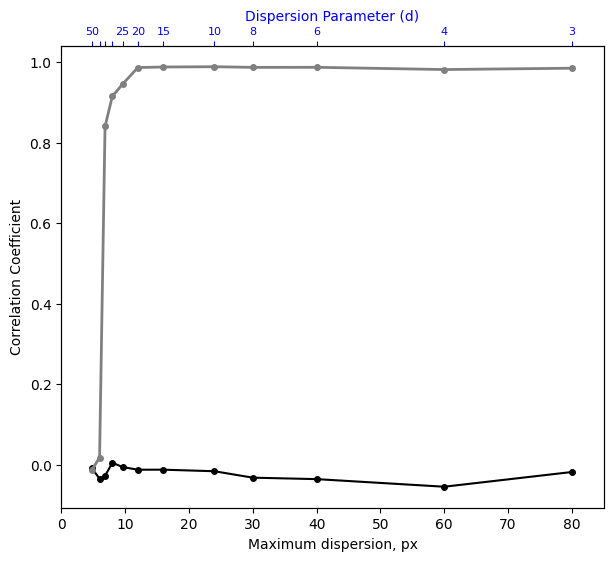

In [249]:
# Plotting
plt.figure(figsize=(7, 6))
plt.plot(mean_movements['max_movement'], correlations_der.values(), linestyle='-', marker='o', color='gray', linewidth=2, zorder=3, markersize=4)
plt.plot(mean_movements['max_movement'], correlations_env.values(), linestyle='-', marker='o', color='black', markersize=4)
plt.xlabel('Maximum dispersion, px')
plt.ylabel('Correlation Coefficient')
plt.xlim(0, 85)

# Adding secondary x-axis
secax = plt.gca().twiny()
secax.set_xlabel('Dispersion Parameter (d)', color='blue')

# label = []
# for key in correlations.keys():
#     label.append(key)
label =  [3, 4, 6, 8, 10, 15, 20, 25, '', '', '', 50]
print(label)


# Set ticks and labels for the secondary x-axis
secax.set_xticks(mean_movements['max_movement'])
secax.set_xticklabels(label, fontsize=8)
secax.tick_params(axis='x', colors='blue')
secax.set_xlim(0, 85)
# secax.invert_xaxis()

plt.show()

[3, 4, 6, 8, 10, 15, 20, 25, '', '', '', 50]


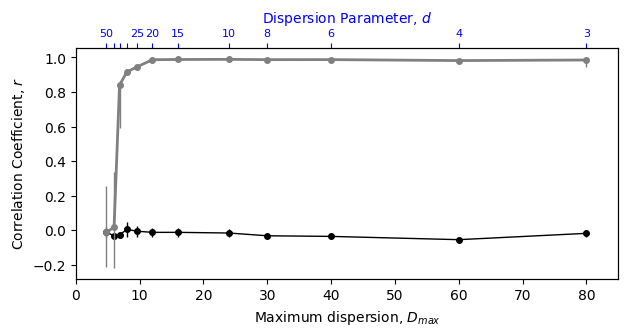

In [250]:
# Extract the correlation values and min/max values
# derivative:
correlation_values_der = list(correlations_der.values())
min_corr_values = [min_max_correlations[key]['min_corr'] for key in updated_correlations]
max_corr_values = [min_max_correlations[key]['max_corr'] for key in updated_correlations]
# Calculate the differences for error bars
yerr_lower = [abs(correlation_values_der[i] - min_corr_values[i]) for i in range(len(correlation_values_der))]
yerr_upper = [abs(max_corr_values[i] - correlation_values_der[i]) for i in range(len(correlation_values_der))]

# environment:
correlation_values_env = list(correlations_env.values())
min_corr_values_env = [min_max_correlations_env[key]['min_corr'] for key in updated_correlations_env]
max_corr_values_env = [min_max_correlations_env[key]['max_corr'] for key in updated_correlations_env]
# Calculate the differences for error bars
yerr_lower_env = [abs(correlation_values_env[i] - min_corr_values_env[i]) for i in range(len(correlation_values_env))]
yerr_upper_env = [abs(max_corr_values_env[i] - correlation_values_env[i]) for i in range(len(correlation_values_env))]


# drawing a canvas
plt.figure(figsize=(7, 3))

# Plot the correlation values
plt.plot(mean_movements['max_movement'], correlation_values_der, linestyle='-', marker='o', color='gray', zorder=3, markersize=4, linewidth=2)
plt.plot(mean_movements['max_movement'], correlation_values_env, linestyle='-', marker='o', color='black',  markersize=4, linewidth=1)
plt.xlabel('Maximum dispersion, ${D_{max}}$')
plt.ylabel('Correlation Coefficient, $r$')
plt.xlim(0, 85)


# Plot the error bars for confidence intervals
plt.errorbar(mean_movements['max_movement'], correlation_values_der, 
             yerr=[yerr_lower, yerr_upper],
             fmt='none', ecolor='gray', capsize=0, linewidth=1, zorder=5)

plt.errorbar(mean_movements['max_movement'], correlation_values_env, 
             yerr=[yerr_lower_env, yerr_upper_env],
             fmt='none', ecolor='black', capsize=0, linewidth=1, zorder=1)

# Adding secondary x-axis
secax = plt.gca().twiny()
secax.set_xlabel('Dispersion Parameter, $d$', color='blue')




label =  [3, 4, 6, 8, 10, 15, 20, 25, '', '', '', 50]
print(label)

# Set ticks and labels for the secondary x-axis
secax.set_xticks(mean_movements['max_movement'])
secax.set_xticklabels(label, fontsize=8)
secax.tick_params(axis='x', colors='blue')
secax.set_xlim(0, 85)
# secax.invert_xaxis()

plt.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-6_high_res.png', dpi=300, bbox_inches='tight')

## Figure S1 and S2

In [57]:
print(folder_path)
print(files) 

# Filter files 
gd_files = [file for file in files if "w50_" in file and "_genetic_diversity.csv" in file and not "grids" in file]
sr_files = [file for file in files if "w50_" in file and "_iterations_species_richness.csv" in file]

/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files
['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness

In [58]:
# Create an empty list to store the DataFrames
dfs = []

# Read and concatenate the relevant CSV files
for file in gd_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path,header=0, index_col=0)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
gd = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
gd.reset_index(drop=True, inplace=True)
gd['Simulation'] = gd['Simulation'].replace('REvoSim_individuals_data_HL.txt', 'REvoSim_individuals_data_envw50_15dp_HL0000.txt')

# Print the concatenated DataFrame
print(gd.head())

   dp                                       Simulation  Diversity
0  30     REvoSim_individuals_data_envw50_30dp_aj1.txt  23.571441
1  30    REvoSim_individuals_data_envw50_30dp_aj10.txt  26.056838
2  30   REvoSim_individuals_data_envw50_30dp_aj100.txt  18.535757
3  30  REvoSim_individuals_data_envw50_30dp_aj1000.txt  26.026406
4  30  REvoSim_individuals_data_envw50_30dp_aj1001.txt  23.147566


In [59]:
# Create an empty list to store the DataFrames
dfs = []

# Read and concatenate the relevant CSV files
for file in sr_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=0).query('Iteration_Number == 99999')
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
sr = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
sr.reset_index(drop=True, inplace=True)

# Print the concatenated DataFrame
print(sr.head())
sr.drop(columns=['Unnamed: 0'], inplace=True)
sr['Simulation'] = sr['Simulation'].replace('REvoSim_log_HL.txt', 'REvoSim_log_envw50_15dp_HL0000.txt')

   Iteration_Number  Species_Count                          Simulation  dp  \
0             99999           8561  REvoSim_log_envw50_30dp_aj1283.txt  30   
1             99999           8623  REvoSim_log_envw50_30dp_aj1216.txt  30   
2             99999           8121  REvoSim_log_envw50_30dp_aj2745.txt  30   
3             99999           8338  REvoSim_log_envw50_30dp_aj1247.txt  30   
4             99999           9035   REvoSim_log_envw50_30dp_aj660.txt  30   

   Unnamed: 0  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [61]:
gd['Simulation_Number'] = gd['Simulation'].apply(lambda x: int(re.findall(r'\d+', x.split('_')[5])[0]))
sr['Simulation_Number'] = sr['Simulation'].apply(lambda x: int(re.findall(r'\d+', x.split('_')[4])[0]))
merged_df = pd.merge(gd, sr, on=['Simulation_Number', 'dp'])
merged_df = merged_df.rename(columns={'dp': 'd'})
print(merged_df.head())

    d                                     Simulation_x  Diversity  \
0  30     REvoSim_individuals_data_envw50_30dp_aj1.txt  23.571441   
1  30    REvoSim_individuals_data_envw50_30dp_aj10.txt  26.056838   
2  30   REvoSim_individuals_data_envw50_30dp_aj100.txt  18.535757   
3  30  REvoSim_individuals_data_envw50_30dp_aj1000.txt  26.026406   
4  30  REvoSim_individuals_data_envw50_30dp_aj1001.txt  23.147566   

   Simulation_Number  Iteration_Number  Species_Count  \
0                  1             99999           6612   
1                 10             99999           8860   
2                100             99999           4620   
3               1000             99999           9115   
4               1001             99999           6818   

                         Simulation_y  
0     REvoSim_log_envw50_30dp_aj1.txt  
1    REvoSim_log_envw50_30dp_aj10.txt  
2   REvoSim_log_envw50_30dp_aj100.txt  
3  REvoSim_log_envw50_30dp_aj1000.txt  
4  REvoSim_log_envw50_30dp_aj1001.txt  


In [64]:
# Find min and max of species richness
print("Min Species Richness", merged_df['Species_Count'].min())
print("Max Species Richness",merged_df['Species_Count'].max())

# Find min and max of Genetic diversity
print("Min genetic diversity", merged_df['Diversity'].min())
print("Max genetic diversity",merged_df['Diversity'].max())

Min Species Richness 1
Max Species Richness 10000
Min genetic diversity 1.3153418284789644
Max genetic diversity 28.474247982391784


In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='d', style='d', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness (log scale)')
plt.ylabel('Genetic Diversity')
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='d', style='d', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness (log scale)')
plt.ylabel('Genetic Diversity')
plt.xscale('log')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='d', style='d', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness')
plt.ylabel('Genetic Diversity')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


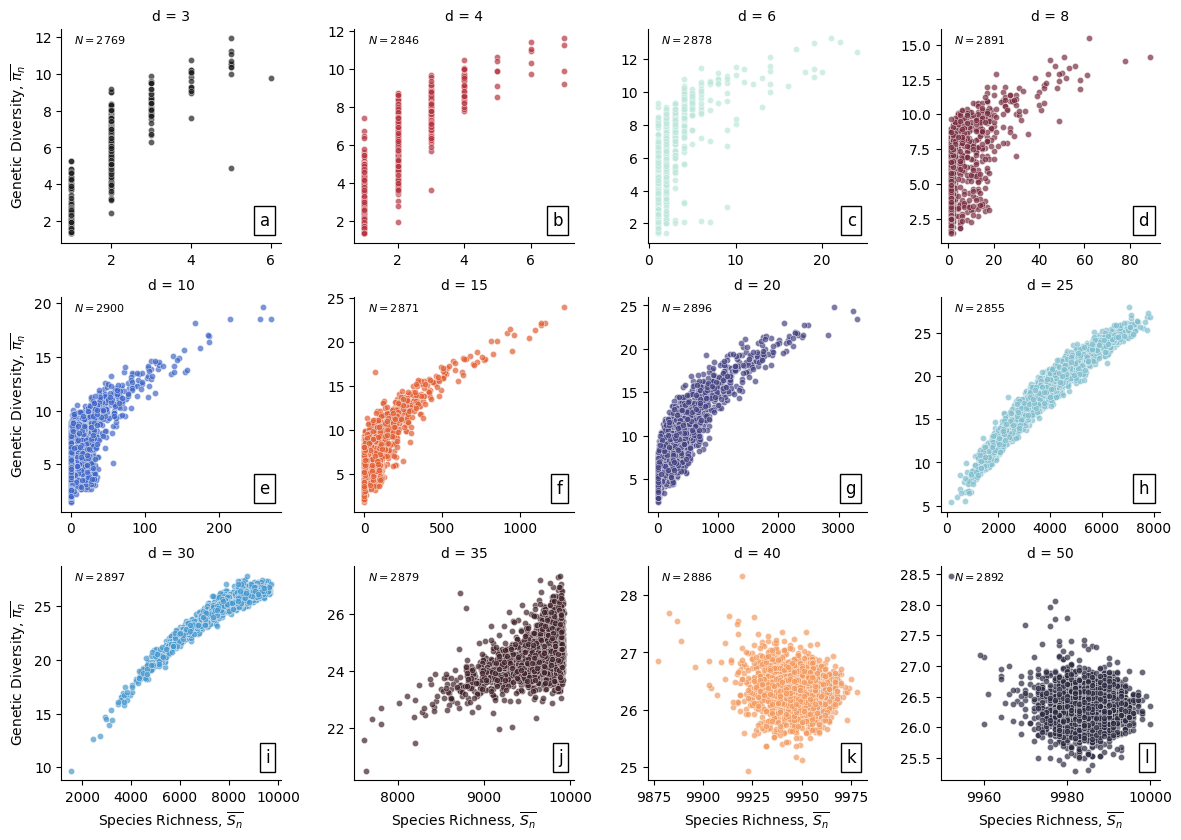

In [277]:
# Create a FacetGrid
g = sns.FacetGrid(merged_df, col='d', col_wrap=4, height=3, sharex=False, sharey=False, hue='d', palette=my_icefire)

# Map the scatterplot onto the FacetGrid
g.map_dataframe(sns.scatterplot, x='Species_Count', y='Diversity',  s=20, alpha=0.7)

# Set labels and titles
g.set_axis_labels('Species Richness, ${\\overline{S_n}}$', 'Genetic Diversity, ${\\overline{\\pi_n}}$')
# g.fig.suptitle('Genetic Diversity vs Species Richness at Equilibrium', fontsize=12)
g.fig.subplots_adjust(top=0.9)

# Add letter labels to each subplot with a box around them
for ax, letter in zip(g.axes.flat, 'abcdefghijklmnopqrstuvwxyz'):
    ax.text(0.95, 0.15, letter, transform=ax.transAxes, fontsize=12, va='top', ha='right', bbox=dict(facecolor='white', edgecolor='black'))

# add sample size
for ax, (name, data) in zip(g.axes.flat, merged_df.groupby('d')):
    ax.text(0.06, 0.98, f"$N={len(data['Simulation_y'].unique())}$", transform=ax.transAxes, fontsize=8, va='top', ha='left')

plt.show()
g.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-S1_high_res.png', dpi=300, bbox_inches='tight')


In [ ]:
print(folder_path)
print(files) 

# Filter files 
gd_files = [file for file in files if "w50_" in file and "_genetic_diversity.csv" in file and not "grids" in file]
sr_files = [file for file in files if "w50_" in file and "_iterations_species_richness.csv" in file]

In [ ]:
# Create an empty list to store the DataFrames
dfs = []

# Read and concatenate the relevant CSV files
for file in gd_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path,header=0, index_col=0)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
gd = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
gd.reset_index(drop=True, inplace=True)
gd['Simulation'] = gd['Simulation'].replace('REvoSim_individuals_data_HL.txt', 'REvoSim_individuals_data_envw50_15dp_HL0000.txt')

# Print the concatenated DataFrame
print(gd.head())

In [ ]:
# Create an empty list to store the DataFrames
dfs = []

# Read and concatenate the relevant CSV files
for file in sr_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=0).query('Iteration_Number == 99999')
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
sr = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
sr.reset_index(drop=True, inplace=True)

# Print the concatenated DataFrame
print(sr.head())
sr.drop(columns=['Unnamed: 0'], inplace=True)
sr['Simulation'] = sr['Simulation'].replace('REvoSim_log_HL.txt', 'REvoSim_log_envw50_15dp_HL0000.txt')

In [ ]:
gd['Simulation_Number'] = gd['Simulation'].apply(lambda x: int(re.findall(r'\d+', x.split('_')[5])[0]))
sr['Simulation_Number'] = sr['Simulation'].apply(lambda x: int(re.findall(r'\d+', x.split('_')[4])[0]))
merged_df = pd.merge(gd, sr, on=['Simulation_Number', 'dp'])
print(merged_df.head())

In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='dp', style='dp', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness (log scale)')
plt.ylabel('Genetic Diversity')
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='dp', style='dp', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness (log scale)')
plt.ylabel('Genetic Diversity')
plt.xscale('log')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


In [ ]:
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, y='Diversity', x='Species_Count', hue='dp', style='dp', palette=my_icefire, s = 20, alpha=0.7)
plt.xlabel('Species Richness')
plt.ylabel('Genetic Diversity')
plt.suptitle('Each point is a simulation', fontsize=9, y=0.92)
plt.title('Genetic Diversity vs Species Richness at Equilibrium', y=1.05)


In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(merged_df, col='dp', col_wrap=4, height=3, sharex=False, sharey=False, hue='dp', palette=my_icefire)

# Map the scatterplot onto the FacetGrid
g.map_dataframe(sns.scatterplot, x='Species_Count', y='Diversity',  s=20, alpha=0.7)

# Set labels and titles
g.set_axis_labels('Species Richness', 'Genetic Diversity')
g.fig.suptitle('Genetic Diversity vs Species Richness at Equilibrium', fontsize=12)
g.fig.subplots_adjust(top=0.9)  

plt.show()


In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(merged_df, col='d', col_wrap=4, height=3, sharex=False, sharey=False, hue='d', palette=my_icefire)

# Map the scatterplot onto the FacetGrid
g.map_dataframe(sns.scatterplot, x='Species_Count', y='Diversity',  s=20, alpha=0.7)

# Set labels and titles
g.set_axis_labels('Species Richness', 'Genetic Diversity')
# g.fig.suptitle('Genetic Diversity vs Species Richness at Equilibrium', fontsize=12)
g.fig.subplots_adjust(top=0.9)  

# Add letter labels to each subplot with a box around them
for ax, letter in zip(g.axes.flat, 'abcdefghijklmnopqrstuvwxyz'):
    ax.text(0.95, 0.15, letter, transform=ax.transAxes, fontsize=12, va='top', ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()


## Heatmaps

In [278]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_grids_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversit

In [280]:
# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as 'grid_{dp}'")
    
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

File 'w50_20dp_grids_species_richness.csv' imported as 'grid_20dp'
File 'w50_35dp_grids_species_richness.csv' imported as 'grid_35dp'
File 'w50_3dp_grids_species_richness.csv' imported as 'grid_3dp'
File 'w50_50dp_grids_species_richness.csv' imported as 'grid_50dp'
File 'w50_25dp_grids_species_richness.csv' imported as 'grid_25dp'
File 'w50_30dp_grids_species_richness.csv' imported as 'grid_30dp'
File 'w50_40dp_grids_species_richness.csv' imported as 'grid_40dp'
File 'w50_8dp_grids_species_richness.csv' imported as 'grid_8dp'
File 'w50_6dp_grids_species_richness.csv' imported as 'grid_6dp'
File 'w50_4dp_grids_species_richness.csv' imported as 'grid_4dp'
File 'w50_15dp_grids_species_richness.csv' imported as 'grid_15dp'
File 'w50_10dp_grids_species_richness.csv' imported as 'grid_10dp'
['20dp', '35dp', '3dp', '50dp', '25dp', '30dp', '40dp', '8dp', '6dp', '4dp', '15dp', '10dp']
[20, 35, 3, 50, 25, 30, 40, 8, 6, 4, 15, 10]


In [281]:
# Make sure we remove the transects that did not run until the end
for dp, df in dfs_int_keys.items():
    # Group the DataFrame by 'Simulation' and count the number of unique 'X coord' values
    cells = df.groupby('Simulation').apply(lambda group: group['X coord'].nunique())
    # Get the simulations that did not run until the end
    not_end = cells[cells <= 1].index
    # Remove the simulations that did not run until the end
    dfs_int_keys[dp] = df[~df['Simulation'].isin(not_end)]

    print(f"Number of complete simulations for d = {dp}: {len(dfs_int_keys[dp]['Simulation'].unique())}")


Number of complete simulations for d = 20: 2896
Number of complete simulations for d = 35: 2879
Number of complete simulations for d = 3: 2769
Number of complete simulations for d = 50: 2892
Number of complete simulations for d = 25: 2855
Number of complete simulations for d = 30: 2897
Number of complete simulations for d = 40: 2886
Number of complete simulations for d = 8: 2891
Number of complete simulations for d = 6: 2878
Number of complete simulations for d = 4: 2846
Number of complete simulations for d = 15: 2871
Number of complete simulations for d = 10: 2900


In [282]:
pivot_heatmaps = {} # Dictionary to store mean DataFrames for each dp

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    pivot = dfs_int_keys[key].pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
    pivot = pivot.fillna(0)
    pivot_heatmaps[dp] = pivot
    
    print(f"pivot calculated for 'd = {dp}'")
    print(pivot_heatmaps[key].head())
    # sns.heatmap(pivot_heatmaps[key], cmap='BuPu', square=True)


pivot calculated for 'd = 3'
X coord        0         1         2         3         4         5         6   \
Y coord                                                                         
0        1.112676  1.106537  1.107981  1.113398  1.101842  1.098592  1.098953   
1        1.112315  1.107981  1.106176  1.107981  1.101842  1.100397  1.093174   
2        1.111231  1.110148  1.105453  1.106537  1.102925  1.093174  1.094619   
3        1.110870  1.112315  1.111231  1.108704  1.102925  1.094619  1.092452   
4        1.111593  1.113398  1.105453  1.104731  1.102564  1.100397  1.095702   

X coord        7         8         9   ...        90        91        92  \
Y coord                                ...                                 
0        1.092813  1.085590  1.081979  ...  1.080173  1.085590  1.090646   
1        1.096425  1.090285  1.082340  ...  1.081979  1.081979  1.089924   
2        1.087035  1.089924  1.077645  ...  1.075117  1.085590  1.089563   
3        1.092091  1.09

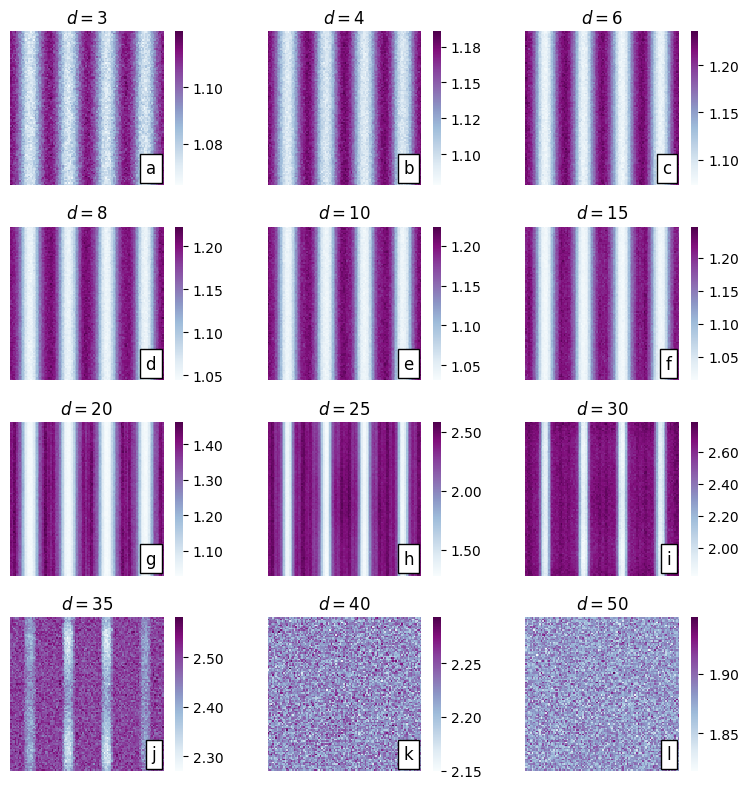

In [283]:
import string

# Define the size of the grid based on the number of heatmaps
num_heatmaps = len(pivot_heatmaps)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_heatmaps + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2*num_rows))  # Adjust figsize as needed

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each heatmap with label
for i, (dp, pivot) in enumerate(pivot_heatmaps.items()):
    row = i // num_cols
    col = i % num_cols
    sns.heatmap(pivot, cmap='BuPu', square=True, ax=axes[row, col], cbar_kws=dict(format='%.2f'))
    axes[row, col].set_title(f'$d = {dp}$')
    axes[row, col].axis('off')  # Turn off axis labels
    
    # Add label ('a', 'b', 'c', etc.) on the heatmap
    axes[row, col].text(0.95, 0.05, string.ascii_lowercase[i], 
                        fontsize=12, 
                        color='black',
                        ha='right',
                        va='bottom', 
                        transform=axes[row, col].transAxes,
                        bbox=dict(facecolor='white', alpha=1, edgecolor='black'))


# Adjust layout
plt.tight_layout()
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-S5_high_res.png', dpi=300, bbox_inches='tight')


The following code is to produce a series of heatmaps for individual simulations

         Unnamed: 0  X coord  Y coord  Species Richness  \
7100036     7100036        0        0                 4   
7100037     7100037        1        0                 4   
7100038     7100038        2        0                 4   
7100039     7100039        3        0                 3   
7100040     7100040        4        0                 2   

                                              Simulation  dp  
7100036  REvoSim_individuals_data_envw50_25dp_aj1044.txt  25  
7100037  REvoSim_individuals_data_envw50_25dp_aj1044.txt  25  
7100038  REvoSim_individuals_data_envw50_25dp_aj1044.txt  25  
7100039  REvoSim_individuals_data_envw50_25dp_aj1044.txt  25  
7100040  REvoSim_individuals_data_envw50_25dp_aj1044.txt  25  


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_8041/519259475.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig

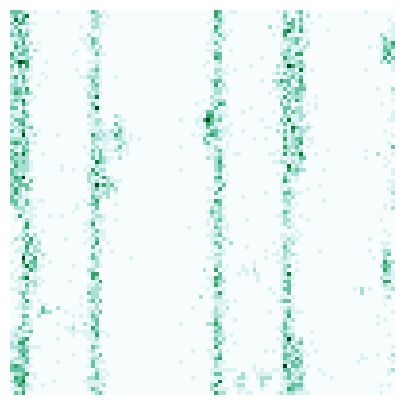

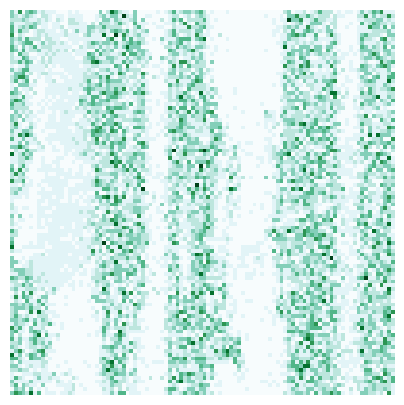

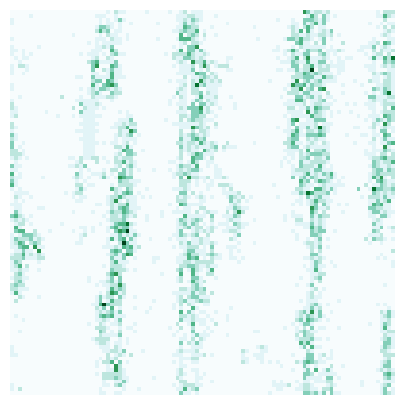

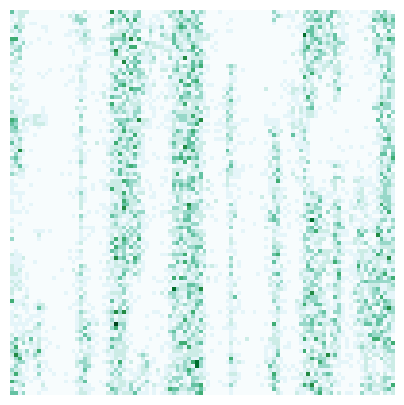

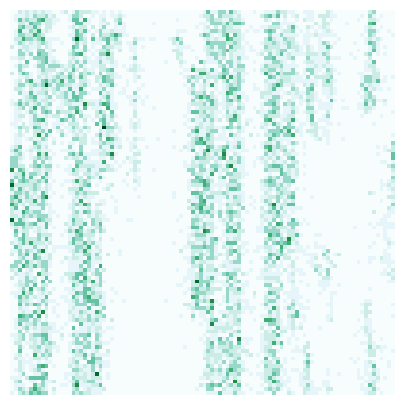

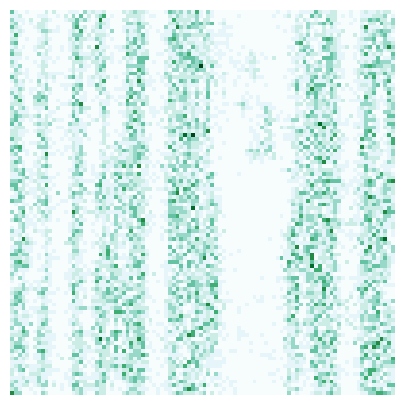

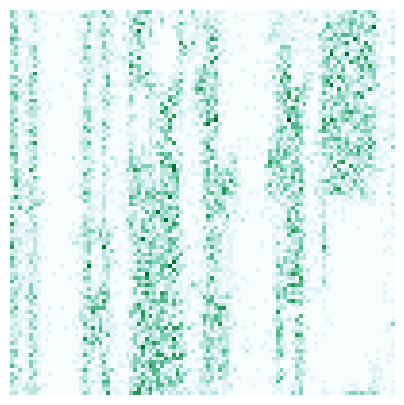

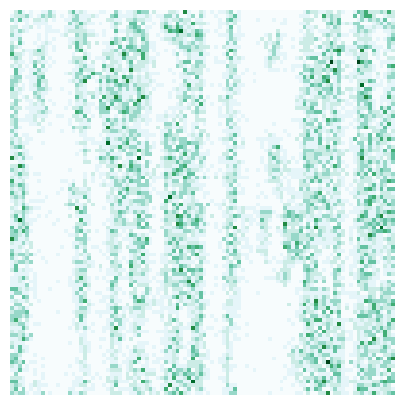

In [116]:
# Filter the DataFrame for these random values
filtered_data_heat15 = dfs_int_keys[25][dfs_int_keys[25]['Simulation'].isin(dfs_int_keys[25]['Simulation'].sample(n=8,random_state=42))]# random_state for reproducibility
print(filtered_data_heat15.head())

sims_unique = filtered_data_heat15['Simulation'].unique()
for i, sim in enumerate(sims_unique):
    sim_data = filtered_data_heat15[filtered_data_heat15['Simulation'] == sim]
    pivot = sim_data.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
    pivot = pivot.fillna(0)
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(pivot, cmap='BuGn', square=True, cbar=False, ax=ax)
    ax.axis('off') # Turn off axis labels
    fig.show()
    fig.savefig(f'/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/heatmap_panel_green_{sim[i]}.png', dpi=300, bbox_inches='tight')

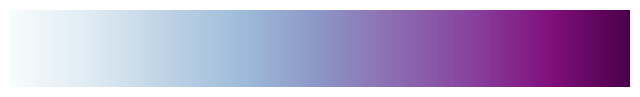

In [118]:
# Create a gradient image using the BuPu color palette
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size, reducing the width
ax.imshow(gradient, aspect='auto', cmap='BuPu')
ax.axis('off')  # Turn off axis
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/heatmap_bar.png', dpi=300, bbox_inches='tight')
plt.show()

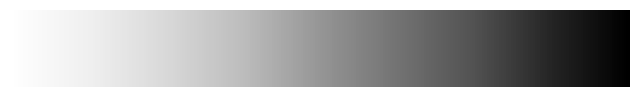

In [49]:
# Create a gradient image using the BuPu color palette
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size, reducing the width
ax.imshow(gradient, aspect='auto', cmap='Greys')
ax.axis('off')  # Turn off axis
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/heatmap_bar_gray.png', dpi=300, bbox_inches='tight')
plt.show()

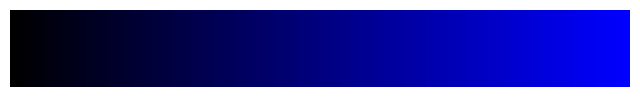

In [52]:
from matplotlib.colors import LinearSegmentedColormap

# defining the custom colormap
cmap_name = 'black_to_blue'
colors = [(0, 0, 0), (0, 0, 1)]  # black to blue in RGB
n_bins = 256  # Discretizes the interpolation into bins
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

#Generating the gradient
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Step 3: Plot the gradient
fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size, reducing the width
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

#save the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/heatmap_bar_blue.png', dpi=300, bbox_inches='tight')

plt.show()

The following code is to understand what is the variability across the y-direction

In [25]:
print(normalized_mean_transects_100.keys()) # thid first appear in figure 6

dict_keys([3, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 50])


In [26]:
pivot_heatmaps_norm = {} # Dictionary to store mean DataFrames for each dp

for i, key in enumerate(sorted(normalized_mean_transects_100.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    pivot_norm = normalized_mean_transects_100[key].pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
    pivot_norm = pivot_norm.fillna(0)
    pivot_heatmaps_norm[dp] = pivot_norm
    
    print(f"pivot calculated for 'd = {dp}'")
    print(pivot_heatmaps_norm[key].head())
    # sns.heatmap(pivot_heatmaps[key], cmap='BuPu', square=True)




pivot calculated for 'd = 3'
X coord        0         1         2         3         4         5         6   \
Y coord                                                                         
0        0.055405  0.051936  0.052752  0.055814  0.049283  0.047446  0.047650   
1        0.055201  0.052752  0.051732  0.052752  0.049283  0.048467  0.044385   
2        0.054589  0.053977  0.051324  0.051936  0.049895  0.044385  0.045201   
3        0.054385  0.055201  0.054589  0.053161  0.049895  0.045201  0.043977   
4        0.054793  0.055814  0.051324  0.050916  0.049691  0.048467  0.045814   

X coord        7         8         9   ...        90        91        92  \
Y coord                                ...                                 
0        0.044181  0.040100  0.038059  ...  0.037038  0.040100  0.042957   
1        0.046222  0.042753  0.038263  ...  0.038059  0.038059  0.042548   
2        0.040916  0.042548  0.035610  ...  0.034181  0.040100  0.042344   
3        0.043773  0.04

In [ ]:
# Define the size of the grid based on the number of heatmaps
num_heatmaps = len(pivot_heatmaps_norm)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_heatmaps + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2*num_rows))  # Adjust figsize as needed

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each heatmap
for i, (dp, pivot_norm) in enumerate(pivot_heatmaps_norm.items()):
    row = i // num_cols
    col = i % num_cols
    sns.heatmap(pivot_norm, cmap='BuPu', square=True, ax=axes[row, col], vmin=0, vmax=1) 
    axes[row, col].set_title(f'd = {dp}')
    axes[row, col].axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Define the size of the grid based on the number of heatmaps
num_heatmaps = len(pivot_heatmaps_norm)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_heatmaps + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2*num_rows))  # Adjust figsize as needed

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each heatmap
for i, (dp, pivot_norm) in enumerate(pivot_heatmaps_norm.items()):
    row = i // num_cols
    col = i % num_cols
    sns.heatmap(pivot_norm, cmap='BuPu', square=True, ax=axes[row, col], vmin=0, vmax=1, cbar=False) 
    axes[row, col].set_title(f'd = {dp}')
    axes[row, col].axis('off')  # Turn off axis labels

# Add a single color bar outside the subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = plt.colorbar(axes[0, 0].collections[0], cax=cbar_ax) 
cbar.outline.set_visible(False)
cbar.ax.invert_yaxis()
# Add a label to the color bar
cbar.set_label('Normalised Species Richness', rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'pivot_heatmaps_norm' is not defined

In [ ]:
#The following it's the dictionary that contains all means in species richness for each coordinate of the grid:
for i, key in enumerate(sorted(mean_transects_100.keys())):
    print(f"Mean calculated for 'd = {key}'")
    print(mean_transects_100[key].head())
    
#proceeding with calculating the variance for each d:
# Initialize lists to store keys and mean variances
keys = []
mean_variances = []

# Calculate variance for each key and collect mean variance
for i, key in enumerate(sorted(mean_transects_100.keys())):
    variance_by_x = mean_transects_100[key].groupby('X coord')['Species Richness'].var()
    mean_variance = variance_by_x.mean()
    keys.append(key)
    mean_variances.append(mean_variance)
    print(f"Mean variance for key {key}: {mean_variance}")

# Plotting
plt.figure(figsize=(5, 4))
plt.plot(keys, mean_variances, color='black', marker="o")
plt.xlabel('d')
plt.ylabel('Mean Variance')
plt.tight_layout()
plt.show()
    

In [ ]:
#Standardisation
#mean of 0 and standard deviation of 1
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize a new dictionary for standardized data
standardized_transects = {}
# Standardize each DataFrame and store in new dictionary
scaler = StandardScaler()
for key, df in mean_transects_100.items():
    # Extract 'Species Richness' column for standardization
    species_richness = df['Species Richness'].values.reshape(-1, 1)
    # Fit and transform using StandardScaler
    standardized_values = scaler.fit_transform(species_richness)
    # Create a new DataFrame with standardized values
    standardized_df = pd.DataFrame({
        'Y coord': df['Y coord'],
        'X coord': df['X coord'],
        'Species Richness (Standardized)': standardized_values.flatten()
    })
    # Store the new DataFrame in the new dictionary
    standardized_transects[key] = standardized_df

# Print or use the standardized data
for key, df in standardized_transects.items():
    print(f"Standardized DataFrame for key '{key}':")
    print(df)
    print()


In [ ]:
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7))  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(standardized_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = standardized_transects[key]
    sns.lineplot(data=df, x='X coord', y='Species Richness (Standardized)', hue='Y coord', errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df, x='X coord', y='Species Richness (Standardized)', errorbar=None, ax=axs[row, col], legend=False, color='green')
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\bar{S}}$', color='green')
    ax.tick_params(axis='y', colors='green')
    ax.set_ylim(-4,4)
        

axs[3, 0].set_xlabel('x Coordinate')
axs[3, 1].set_xlabel('x Coordinate')
axs[3, 2].set_xlabel('x Coordinate')

plt.tight_layout()  
plt.show()

In [ ]:
# Calculate mean variance for each key
mean_variances = {}
for key, df in standardized_transects.items():
    variance_by_x = df.groupby('X coord')['Species Richness (Standardized)'].var()
    mean_variance = variance_by_x.mean()
    mean_variances[key] = mean_variance
    print(f"Mean variance for key '{key}': {mean_variance}")

# Plotting
plt.figure(figsize=(5, 4))
plt.plot(mean_variances.keys(), mean_variances.values(), color='black', marker = 'o')
plt.xlabel('d')
plt.ylabel('Mean Variance (Standardised)')
plt.tight_layout()
plt.show()

In [ ]:
# Initialize a new dictionary for normalized data at each x position
standardised_x_transects = {}

# Normalize each DataFrame and store in new dictionary
for key, df in mean_transects_100.items():
    # Calculate mean and standard deviation for each X coord
    mean_by_x = df.groupby('X coord')['Species Richness'].mean()
    std_by_x = df.groupby('X coord')['Species Richness'].std()
    
    # Normalize 'Species Richness' column
    df['Species Richness (Normalized)'] = df.apply(lambda row: (row['Species Richness'] - mean_by_x[row['X coord']]) / std_by_x[row['X coord']], axis=1)
    
    # Store the new DataFrame in the new dictionary
    standardised_x_transects[key] = df

# Print normalized data for each key
for key, df in standardised_x_transects.items():
    print(f"Key: '{key}'")
    print(df)
    print()
    


In [ ]:
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7))  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(standardised_x_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = standardised_x_transects[key]
    sns.lineplot(data=df, x='X coord', y='Species Richness (Normalized)', hue='Y coord', errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df, x='X coord', y='Species Richness (Normalized)', errorbar=None, ax=axs[row, col], legend=False, color='green')
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\bar{S}}$', color='green')
    ax.tick_params(axis='y', colors='green')
    ax.set_ylim(-4,4)
        

axs[3, 0].set_xlabel('x Coordinate')
axs[3, 1].set_xlabel('x Coordinate')
axs[3, 2].set_xlabel('x Coordinate')

plt.tight_layout()  
plt.show()

FROM GARETH:
I don’t think normalising is the thing to do here, instead I think the things to do are:

(1) Show the x-transects with their (transect-specific) grand means subtracted (i.e. “zero mean” each transect by subtracting mean value of each transect; work on each transect individually obvs!). That should give simpler visual way to see amplitude of signal and noise (all transects will be centred on zero and still have same shape as before). 

(2) To isolate the ‘noise’ I think you can then subtract the mean value at each x position from the S values at that position. That should then show spread of S values at each x without the ‘signal’ (again centred on zero). By signal I mean S-bar as given in the Ms. 

(3) You can then plot the spread of residual values (the noise) for each d value, like your first plot in previous email but without having to normalise. 

In [ ]:
# Dictionary to store the modified DataFrames
modified_transects = {}
grays = ['gray']

# Loop through each DataFrame in the dictionary
for key, df in mean_transects_100.items():

    # Find the mean of 'Species Richness' for each 'Y coord'
    dfmean = df.groupby('Y coord')['Species Richness'].mean()
    
    # Map the mean 'Species Richness' back to the original DataFrame
    df['Mean Species Richness for transect'] = df['Y coord'].map(dfmean)
    
    # Calculate the new 'Species Richness'
    df['new SR'] = df['Species Richness'] - df['Mean Species Richness for transect']
    
    # Store the modified DataFrame in the new dictionary
    modified_transects[key] = df
    # Display the head of one of the modified DataFrames as an example
    print(modified_transects[key].head())
    
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 7))  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(modified_transects.keys())):
    row = (i) // 3
    col = (i) % 3
    df = modified_transects[key]
    sns.lineplot(data=df, x='X coord', y='new SR', hue='Y coord', errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    # sns.lineplot(data=df, x='X coord', y='new SR', errorbar=None, ax=axs[row, col], legend=False, color='green')
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    # axs[row, col].add_patch(Rectangle((0.008, 0.89), 0.11, 0.1, linewidth=1, edgecolor='none', facecolor='white', transform=axs[row, col].transAxes, alpha=0.9, zorder=2 ))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\bar{S}}$', color='green')
    ax.tick_params(axis='y', colors='green')
        

axs[3, 0].set_xlabel('x Coordinate')
axs[3, 1].set_xlabel('x Coordinate')
axs[3, 2].set_xlabel('x Coordinate')

plt.tight_layout()  
plt.show()


In [ ]:
# Calculate mean variance for each key
mean_variances_GR = {}
for key, df in modified_transects.items():
    variance_by_x = df.groupby('X coord')['new SR'].var()
    mean_variance = variance_by_x.mean()
    mean_variances[key] = mean_variance
    print(f"Mean variance for key '{key}': {mean_variance}")

# Plotting
plt.figure(figsize=(5, 4))
plt.plot(mean_variances.keys(), mean_variances.values(), color='black', marker = 'o')
plt.xlabel('d')
plt.ylabel("Mean Variance (Gareth's Approach)")
plt.tight_layout()
plt.show()

Analysis of Y-axis Variability

I do nto think that what Gareth did is 100% answering our question, so I tried the following. 

Steps to Compare Variability

1. **Calculate the Mean and Standard Deviation for X position**

 - Compute the mean (average) species richness for each x position.
 - Compute the standard deviation (SD) species richness for each x position.

2. **Calculate the Coefficient of Variation (CV)**
 - The CV is a standardized measure of dispersion of a probability distribution. It is defined as the ratio of the standard deviation to the mean, often expressed as a percentage. Formula:
 $\text{CV} = \frac{\text{SD}}{\text{Mean}} \times 100\%$

3. **Interpret the CV**

 - The X with the higher CV has greater variability relative to its mean, indicating a higher spread from the mean.
 


In [31]:
# To do so I will use the mean_transects_100 dictionary that contains the mean species richness for each coordinate
for key, df in mean_transects_100.items():
    print(mean_transects_100[key].head())

   Y coord  X coord  Species Richness
0        0        0          1.112676
1        0        1          1.106537
2        0        2          1.107981
3        0        3          1.113398
4        0        4          1.101842
   Y coord  X coord  Species Richness
0        0        0          1.178145
1        0        1          1.169009
2        0        2          1.173226
3        0        3          1.163387
4        0        4          1.157765
   Y coord  X coord  Species Richness
0        0        0          1.221334
1        0        1          1.219597
2        0        2          1.202224
3        0        3          1.199097
4        0        4          1.197359
   Y coord  X coord  Species Richness
0        0        0          1.203044
1        0        1          1.197510
2        0        2          1.189554
3        0        3          1.181252
4        0        4          1.176410
   Y coord  X coord  Species Richness
0        0        0          1.197241
1        0  

In [1]:
from matplotlib.ticker import FormatStrFormatter
# Loop through each DataFrame in the dictionary and calculate SD and CV for each X coord (for each vertical strip)

# List to collect mean vertical CV data and plot them later against the d values. 
mean_cv_data = []
# Create a figure with a grid of subplots to plot data in one pic
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharey=True)

# Loop through the keys and dataframe
for i, (key, df) in enumerate(sorted(mean_transects_100.items())):
    
    row = i // 3
    col = i % 3
    
    df = mean_transects_100[key]
    print(df.head())
    mean_vertical_strip = df.groupby('X coord')['Species Richness'].mean()
    print("mean Species Richness of the vertical strip:")
    print(mean_vertical_strip.head())

    SD_vertical_strip = df.groupby('X coord')['Species Richness'].std()
    print("SD vertical strip:")
    print(SD_vertical_strip.head())

    CV = (SD_vertical_strip/mean_vertical_strip)*100
    print("Coefficient of variation vertical strip:")
    print(CV.head())
    
    mean_vertical_CV = CV.mean()
    print("Overall vertical (mean) SD for d=", key ,  mean_vertical_CV )
    # Append key and mean_vertical_CV to the list
    mean_cv_data.append([key, mean_vertical_CV])
    

    # plt.figure(figsize=(5, 3))
    # plt.plot(CV)
    # # Plot the coefficient of variation on the respective subplot
    axs[row, col].plot(CV, color='black')
    axs[row, col].text(0.01, 1, f'd={key}', transform=axs[row, col].transAxes, fontsize=11, verticalalignment='bottom', color='black')
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Adjust labels and layout
for ax in axs.flat:
    ax.set_ylabel('CV', color='black')
    ax.tick_params(axis='y', colors='black')

# Set x-axis labels for the bottom row
for col in range(3):
    axs[3, col].set_xlabel('x Coordinate')

plt.tight_layout()
plt.show()

# Convert list to DataFrame
mean_cv_df = pd.DataFrame(mean_cv_data, columns=['Dispersion Parameter', 'Mean CV'])


NameError: name 'plt' is not defined

Text(0, 0.5, 'Mean CV for vertical stripes')

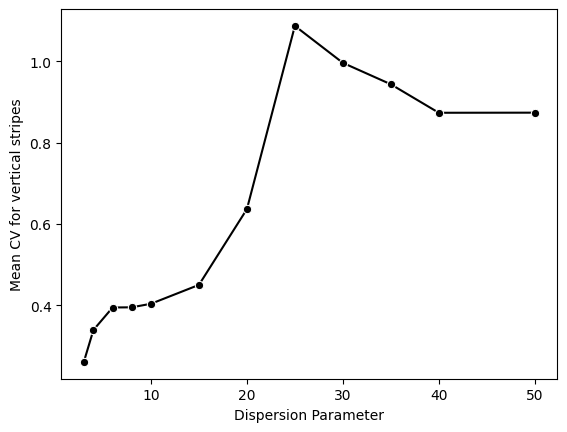

In [46]:
sns.lineplot(data=mean_cv_df, x='Dispersion Parameter', y='Mean CV', marker='o', color='black')
plt.ylabel( 'Mean CV for vertical stripes')

## Figure bonus

Which includes the 3D graphs and an explanation of the discrete sinusoidal function 

In [3]:
# Get Blue values as read by Rivosim
colsin = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50_megabatch/combined_colsin_w50_15dp.csv', sep=',')
colsin = colsin.drop_duplicates(subset=['X coord', 'environment B value'])


In [5]:
x = colsin["X coord"]
y = colsin["environment B value"]
meanSRd15 = combined_transects.groupby(['X coord'])['Species Richness'].mean().reset_index() #combined_transect is introduced in figure 4
meanSRd15 = meanSRd15['Species Richness']
species_richness_approx = (0.5  * np.cos(2 * np.pi * (x / 25)))

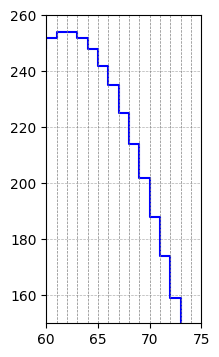

In [489]:

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(2, 4))

# Create a stepped area plot
ax.step(x, y, where='pre', color='blue', linestyle='-')

# Add vertical lines at each x position to check the step it is position correctly as it should be for each pixel.
for x_pos in x:
    ax.axvline(x=x_pos, color='gray', linestyle='--', linewidth=0.5)
ax.grid(axis='y', linestyle='--', linewidth=0.5)
# Set the x and y axis limits
ax.set_xlim(60, 75)
ax.set_ylim(150, 260)

# Show the plot
plt.show()

As above but with SR included as well


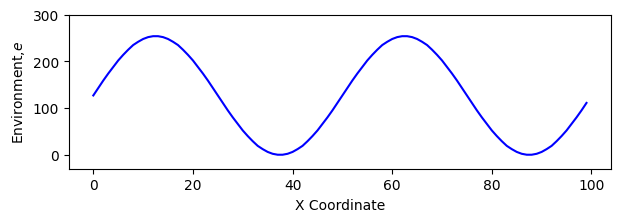

In [99]:
fig = plt.subplots(figsize = (7, 2))
sns.lineplot(data=colsin, x='X coord', y='environment B value', color="blue")
plt.ylim(-30, 300)
plt.xlabel('X Coordinate')
plt.ylabel('Environment,$e$')
# Show the plot
plt.show()

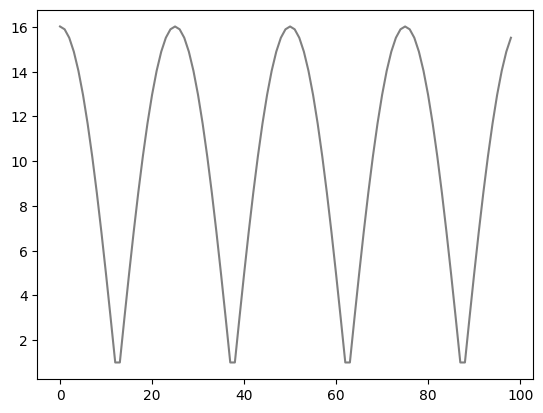

In [10]:
plt.plot(list(range(0, 99)), devsin, color="gray")

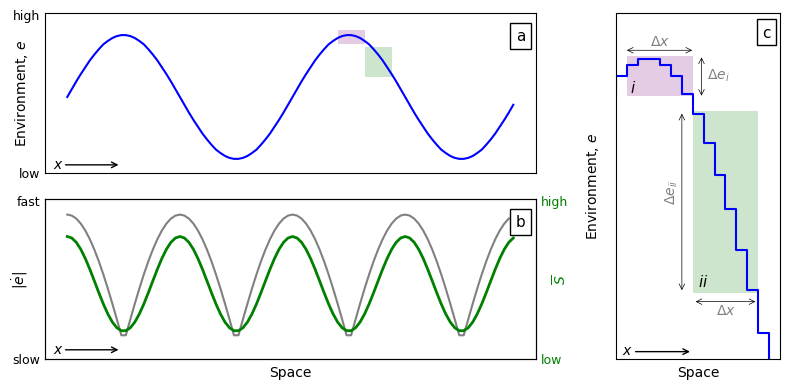

In [11]:
# Create figure and GridSpec layout
# Create the figure
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1])

# Graph A (top left)
ax1 = fig.add_subplot(gs[0, 0])
sns.lineplot(data=colsin, x='X coord', y='environment B value', color="blue", ax = ax1)
ax1.set_ylabel('Environment, $e$')
ax1.set_ylim(-30, 300)
ax1.set_xlabel("")
ax1.set_yticklabels([])
ax1.annotate('a', xy=(0.96, 0.83), xycoords='axes fraction', fontsize=11, color='black', bbox=dict(edgecolor='black', facecolor='white'))

ax1.text(-0.01, 0.98, 'high' , transform=ax1.transAxes, fontsize=9, va='center', ha='right')
ax1.text(-0.01, 0, 'low',  transform=ax1.transAxes, fontsize=9, va='center', ha='right')

rect1 = patches.Rectangle((60, 235), 6, 30, linewidth=1, edgecolor='none', facecolor='purple', alpha=0.2)
ax1.add_patch(rect1)
rect2 = patches.Rectangle((66, 169), 6, 60, linewidth=1, edgecolor='none', facecolor='green', alpha=0.2)
ax1.add_patch(rect2)

# Graph B (bottom left)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax2.plot(list(range(0, 99)), devsin, color="gray")
ax2.set_xlabel('Space')
ax2.set_ylabel('${|\\dot{e}|}$')
ax2.set_yticklabels([])
ax2.set_ylim(-2, 18)
ax2.text(-0.01, 0.98, 'fast' , transform=ax2.transAxes, fontsize=9, va='center', ha='right')
ax2.text(-0.01, 0, 'slow',  transform=ax2.transAxes, fontsize=9, va='center', ha='right')
#adding a secondary axis, with species richness
ax2_twin = ax2.twinx()
ax2_twin.set_yticklabels([])
ax2_twin.set_ylabel('${\\overline{S}}$', color='green')
ax2_twin.plot(x, species_richness_approx, linewidth=2, color='green', label='Species Richness')
ax2_twin.text(1.01, 0.98, 'high' , transform=ax2_twin.transAxes, fontsize=9, va='center', ha='left', color='green')
ax2_twin.text(1.01, 0, 'low',  transform=ax2_twin.transAxes, fontsize=9, va='center', ha='left', color='green')
ax2_twin.set_ylim(-0.8, 0.9)
ax2.annotate('b', xy=(0.96, 0.83), xycoords='axes fraction', fontsize=11, color='black', bbox=dict(edgecolor='black', facecolor='white'))

# Graph C (right side, spans both rows)
ax3 = fig.add_subplot(gs[:, 1])
ax3.step(x, y, where='pre', color='blue', linestyle='-')
ax3.set_xlim(59, 74)
ax3.set_ylim(150, 270)

#dding the various rectangles
rect1 = patches.Rectangle((60, 241), 6, 14, linewidth=1, edgecolor='none', facecolor='purple', alpha=0.2)
ax3.add_patch(rect1)
rect2 = patches.Rectangle((66, 173), 6, 63, linewidth=1, edgecolor='none', facecolor='green', alpha=0.2)
ax3.add_patch(rect2)
ax3.annotate('c', xy=(0.89, 0.93), xycoords='axes fraction', fontsize=11, color='black', bbox=dict(edgecolor='black', facecolor='white'))
ax3.text(60.5, 244, '$i$',  ha='center', va='center', fontsize=11, color='black', weight="bold")
ax3.text(67, 177, '$ii$',  ha='center', va='center', fontsize=11, color='black', weight="bold")
ax3.set_ylabel('Environment, $e$')
ax3.set_xlabel('Space')
ax3.set_yticklabels([])

#adding arrows on the green rectangle
ax3.annotate('', xy=(65, 236), xytext=(65, 173), arrowprops=dict( lw=0.5, facecolor='black', edgecolor='black', arrowstyle='<->'), zorder=3, alpha=0.5)
ax3.annotate('', xy=(66, 170), xytext=(72, 170), arrowprops=dict( lw=0.5, facecolor='black', edgecolor='black', arrowstyle='<->'), zorder=3, alpha=0.5)
ax3.text(64.8, 208, '${\\Delta{e_{ii}}}$',  ha='right', va='center', fontsize=10, color='black', weight="bold",  alpha=0.5, rotation=90)
# ax3.text(63.2, 208, '${\\Delta{e_{ii}}}$',  ha='center', va='center', fontsize=10, color='black', weight="bold",  alpha=0.5)
ax3.text(69, 167, '${\\Delta{x}}$',  ha='center', va='center', fontsize=10, color='black', weight="bold",  alpha=0.5)


#adding arrows on the purple rectangle
ax3.annotate('', xy=(66.8, 240.3), xytext=(66.8, 255.5), arrowprops=dict( lw=0.5, facecolor='black', edgecolor='black', arrowstyle='<->'), zorder=3, alpha=0.5)
ax3.annotate('', xy=(59.7, 257), xytext=(66.2, 257), arrowprops=dict( lw=0.5, facecolor='black', edgecolor='black', arrowstyle='<->'), zorder=3, alpha=0.5)
ax3.text(67.3, 248.2, '${\\Delta{e_{i}}}$',  ha='left', va='center', fontsize=10, color='black', weight="bold",  alpha=0.5)
ax3.text(63, 260, '${\\Delta{x}}$',  ha='center', va='center', fontsize=10, color='black', weight="bold",  alpha=0.5)


# adding an arrow with an x label
ax3.annotate('', xy=(66, 152.7), xytext=(60.5, 152.7), arrowprops=dict( lw=1, facecolor='black', edgecolor='black', arrowstyle='->'), zorder=3)
ax3.text(60, 153, '$x$',  ha='center', va='center', fontsize=10, color='black', weight="bold")

ax1.annotate('', xy=(-1, -12.3), xytext=(12, -12.3), arrowprops=dict( lw=1, facecolor='black', edgecolor='black', arrowstyle='<-'), zorder=3)
ax1.text(-2, -12, '$x$',  ha='center', va='center', fontsize=10, color='black', weight="bold")

ax2.annotate('', xy=(-1, -0.8), xytext=(12, -0.8), arrowprops=dict( lw=1, facecolor='black', edgecolor='black', arrowstyle='<-'), zorder=3)
ax2.text(-2, -0.7, '$x$',  ha='center', va='center', fontsize=10, color='black', weight="bold")

# # adding a small box with delta e 
# rect3 = patches.Rectangle((60, 157), 5, 12, linewidth=1, edgecolor='black', facecolor='none', alpha=0.5)
# ax3.add_patch(rect3)

# unit = patches.Rectangle((60.5, 162), 0.1, 2, linewidth=1, edgecolor='black', facecolor='none', alpha=0.5)
# ax3.add_patch(unit)
# ax3.text(61, 161, '${\\Delta{e}=2}$',  ha='left', va='bottom', fontsize=8, color='black', weight="bold", alpha=0.5)


for ax in [ax1, ax2, ax3, ax2_twin]:
    ax.tick_params(axis='y', which='both', left=False, right=False)
    ax.set_xticks([])




# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-bonus_high_res.png', dpi=300, bbox_inches='tight')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

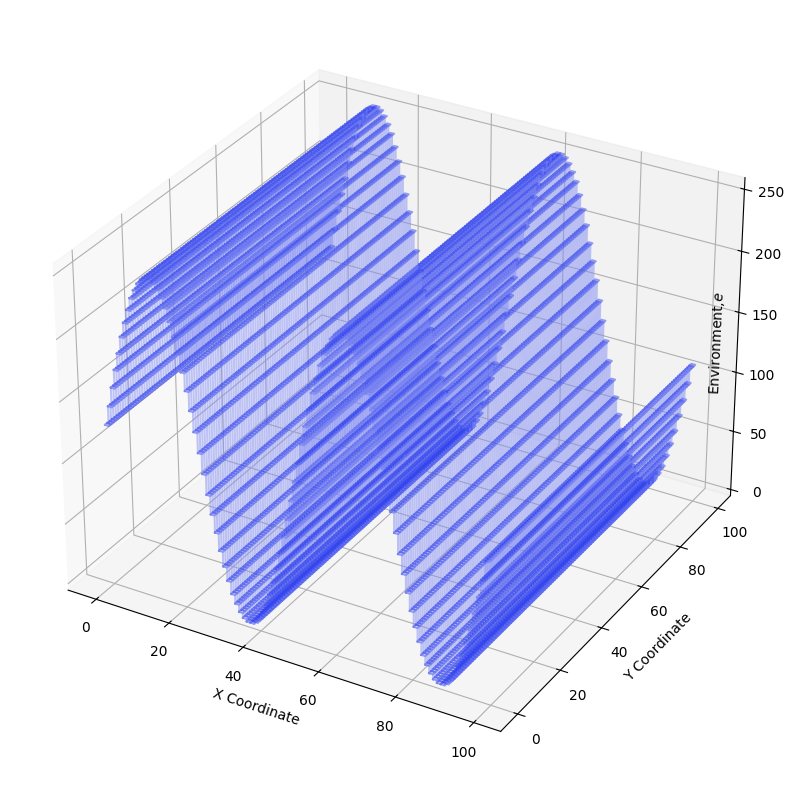

In [11]:
# Create a 3D grid
x = colsin["X coord"]
y = np.linspace(0, 99, 100)
X, Y = np.meshgrid(x, y)
Z = np.tile(colsin["environment B value"], (100, 1))

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Flatten the grid arrays for plotting
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Set the width of the squares
dx = dy = 1

# Create squares at the tops of the bars and connect them with lines
for i in range(len(X_flat)):
    # Draw the top surface of the bar as a square
    ax.plot([X_flat[i] - dx/2, X_flat[i] + dx/2, X_flat[i] + dx/2, X_flat[i] - dx/2, X_flat[i] - dx/2],
            [Y_flat[i] - dy/2, Y_flat[i] - dy/2, Y_flat[i] + dy/2, Y_flat[i] + dy/2, Y_flat[i] - dy/2],
            [Z_flat[i]]*5, color='#3344EE', alpha=0.5)
    
    # Connect the right edge to the next right edge
    if (i + 1) % 100 != 0:  # Ensure it's not the last column in a row
        ax.plot([X_flat[i] + dx/2, X_flat[i + 1] - dx/2],
                [Y_flat[i] - dy/2, Y_flat[i + 1] - dy/2],
                [Z_flat[i], Z_flat[i + 1]], color='#838DF3', alpha=0.5)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Environment,$e$', labelpad=-30)


plt.show()


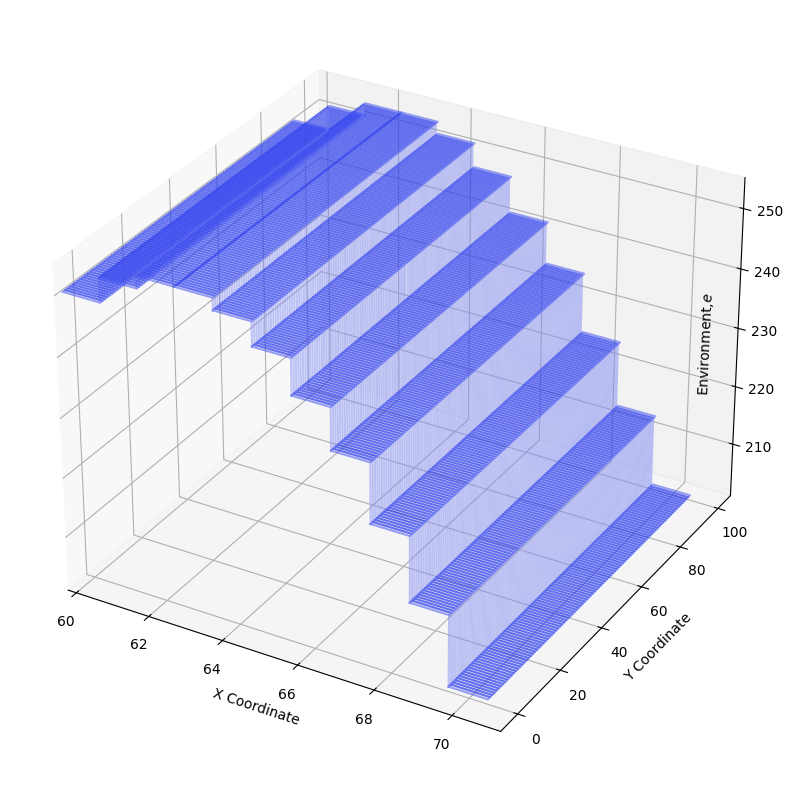

In [12]:
# Create a 3D grid
x = colsin["X coord"]
y = np.linspace(0, 99, 100)
X, Y = np.meshgrid(x, y)
Z = np.tile(colsin["environment B value"], (100, 1))

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Flatten the grid arrays for plotting
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Set the width of the squares
dx = dy = 1

# Filter data to zoom in on X coord range from 60 to 70
zoomed_indices = np.where((X_flat >= 60) & (X_flat <= 70))[0]

# Create squares at the tops of the bars and connect them with lines
for i in zoomed_indices:
    # Draw the top surface of the bar as a square
    ax.plot([X_flat[i] - dx/2, X_flat[i] + dx/2, X_flat[i] + dx/2, X_flat[i] - dx/2, X_flat[i] - dx/2],
            [Y_flat[i] - dy/2, Y_flat[i] - dy/2, Y_flat[i] + dy/2, Y_flat[i] + dy/2, Y_flat[i] - dy/2],
            [Z_flat[i]]*5, color='#3344EE', alpha=0.5)
    
    # Connect the right edge to the next right edge
    if (i + 1) % 100 != 0 and i + 1 in zoomed_indices:  # Ensure it's not the last column in a row
        next_index = zoomed_indices[np.where(zoomed_indices == i)[0][0] + 1]
        ax.plot([X_flat[i] + dx/2, X_flat[next_index] - dx/2],
                [Y_flat[i] - dy/2, Y_flat[next_index] - dy/2],
                [Z_flat[i], Z_flat[next_index]], color='#838DF3', alpha=0.5)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Environment,$e$', labelpad=-35)

# Set limits for X axis to zoom in on 60 to 70 range
ax.set_xlim(60, 71)



plt.show()